# Sberbank House Price Prediction
***
### _Hossein Namazian_
#### July 2017
***

# Contents:

- [Introduction](#Introduction)

- [Acquiring Data](#Acquiring-Data)

- [Data Wrangling](#Data-Wrangling)

    - [Read the datasets](#Read-the-datasets)
    
    - [Feature classes](#Feature-classes)
    
    - [Number of missing data](#Number-of-missing-data)
    
    - [Bad Data and Outliers](#Bad-Data-and-Outliers)
    
        - [House characteristic features](#House-characteristic-features)
    
        - [Total Area](#Total-Area)
    
        - [Total Area vs. House Price](#Total-Area-vs.-House-Price)
    
        - [Life Area](#Life-Area)
    
        - [Life Area vs. House Price](#Life-Area-vs.-House-Price)
    
        - [Kitchen Area](#Kitchen-Area)
    
        - [Kitchen Area vs. House Price](#Kitchen-Area-vs.-House-Price)
    
        - [Relations between Total Area](#Relations-between-Total-Area)
    
        - [Life Area and Kitchen Area](#Life-Area-and-Kitchen-Area)
    
        - [Number of Rooms](#Number-of-Rooms)
    
        - [Maximum Floor vs. FLoor](#Maximum-Floor-vs.-FLoor)
    
        - [State](#State)
    
        - [Build year](#Build-year)
        
    - [Handling Categorical data](#Handling-Categorical-data)
    
    - [Handling Missing data](#Handling-Missing-data)
       
    - [Feature Engineering](#Feature-Engineering)
    
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

    - [Region](#Region)

    - [House Characteristics](#House-Characteristics)
	
        - [State](#State)
	
        - [AGE](#AGE)
    
        - [Floor](#Floor)
    
        - [Wall Material](#Wall-Material)
    
        - [Product type](#Product-type)
    
    - [Shopping Center](#Shopping-Center)
        
    - [Demographic](#Demographic)

    - [Culture](#Culture)
    
    - [Industry](#Industry)
    
        - [Nuclear Reactor](#Nuclear-Reactor)
    
        - [Nuclear Reactor](#)
        
        - [Incineration](#Incineration)
        
    - [Transportation](#Transportation)
    
        - [Moscow Circle Auto Road](#Moscow-Circle-Auto-Road)
        
        - [Third Transport Ring](#Third-Transport-Ring)
        
        - [Garden Ring](#Garden-Ring)
        
        - [Subway](#Subway)
        
    - [Kremlin](#Kremlin)
   
    - [Public Healthcare](#Public-Healthcare)
   
    - [Ecology](#Ecology)
   
    - [Green Zone](#Green-Zone)
   
    - [Shopping Mall](#Shopping-Mall)

    - [Time series](#Time-series)
    
    - [Economical Parameters](#Economical-Parameters)
    
        - [USD-RUBL](#USD-RUBL)
        
        - [CPI](#CPI)
        
        - [Salary](#Salary)
        
        - [Housing Fund](#Housing-Fund)
        
    - [Correlations](#Correlations)
   
    - [Important Features](#Important-Features)
   
- [Machine Learning](#Machine-Learning)

    - [Data preperation](#Data-preperation)
        
        - [Data Wrnagling](#Data-Wrnagling)
        
        - [Feature Engineering](#Feature-Engineering)
        
        - [Label Encoding](#Label-Encoding)
        
        - [Split data to test and train](#Split-data-to-test-and-train)
        
        - [Imputation](#Imputation)
        
        - [Useful Functions](#Useful-Functions)
    
    - [Regression Power](#Regression-Power)
    
        - [Linear Model](#Linear-Model)
        
        - [Decision Tree](#Decision-Tree)
        
        - [Random Forest](#Random-Forest)
        
        - [Gradient Boosting](#Gradient-Boosting)
        
        - [Extreme Gradient Boosting](#Extreme-Gradient-Boosting)
        
        - [Summary on Regression Power](#Summary-on-Regression-Power)
        
    - [Forecasting Power](#Forecasting-Power)
    
		- [Linear Model ](#Linear-Model-)
        
        - [Decision Tree](#Decision-Tree)
        
        - [Random Forest](#Random-Forest)
        
        - [Gradient Boosting](#Gradient-Boosting)
        
        - [Extreme Gradient Boosting](#Extreme-Gradient-Boosting)
        
- [Conclusion and Future Works](#Conclusion-and-Future-Works)
    
    


## Introduction

Housing costs demand a significant investment from both consumers and developers. And when it comes to planning a budget—whether personal or corporate—the last thing anyone needs is uncertainty about one of their biggest expenses. Sberbank, Russia’s oldest and largest bank, helps their customers by making predictions about realty prices so renters, developers, and lenders are more confident when they sign a lease or purchase a building.

Although the housing market is relatively stable in Russia, the country’s volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as number of bedrooms and location are enough to make pricing predictions complicated. Adding an unstable economy to the mix means Sberbank and their customers need more than simple regression models in their arsenal.


## Acquiring Data

The `Sberbank Russian Housing Market dataset` has recently been released by Sber Bank, the oldest and the largest Russia's bank (https://www.kaggle.com/c/sberbank-russian-housing-market/data). The datasets was released for kagglers to propose some models to forecast the house prices. The train dataset contains more than 30000 transactions from August 2011 to June 2015 in the Russian House Market for some years, and the macro dataset provides the daily economic parameters in Russia. A test data also published to evaluate the kagglers' models. As the real prices in the test file is hidden by comptition holders, therefor for the purpose of this capstone project, only the train and macro data is used.

The train data contains 30471 rows with 391 columns for each data point, which has been collected from August 2011 to June 2015. The dataset has been riched with different types of features such as house characteristics, demographics, cultural information, country economical information, etc. The macro data includes 100 economical parameters in Russia for 2484 successive days.

## Data Wrangling

The dataset is a real big data with hundreds of columns and thousands of rows. First of all it's very beneficial to classify all the features to better understand about the data and the relations between different columns. I devided the columns of the train data into 13 classes and inserted the related features in each one.

The bigger data provides the more information helps learning better predictive models, on the other hand, the more concerns arise. Here we go through the data finding missing values and seeking outlier and logically wrong values such as bad relationships within each feature and between different features. For each of these cases there would be different strategies to deal with.

### Read the datasets

In [131]:
import pandas as pd
import numpy as np
import scipy as scp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
import statsmodels.api as sm
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [132]:
train = pd.read_csv('./data/Sber Bank/train.csv', parse_dates=['timestamp'])
macro = pd.read_csv('./data/Sber Bank/macro.csv', parse_dates=['timestamp'])
train = pd.merge(train, macro, on='timestamp')

print 'train data shape: {}'.format(train.shape)
print 'macro data shape: {}'.format(macro.shape)

train data shape: (30471, 391)
macro data shape: (2484, 100)


### Feature classes

In [133]:
col_house_char = ['full_sq', 'life_sq', 'kitch_sq', 'num_room', 'floor', 'max_floor', 'material', 'build_year', 'state', 'price_doc']

col_demographic = ['area_m', 'raion_popul', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female',
                   'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male',
                   '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all',
                   '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female',]

col_school = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school',
              'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion',
              'university_top_20_raion', 'additional_education_raion', 
              'additional_education_km', 'preschool_km', 'school_km']

col_culture = ['big_church_km', 'church_synagogue_km', 'big_church_count_500', 
               'big_church_count_1000', 'church_count_1000', 'big_church_count_1500', 'church_count_1500',
               'big_church_count_2000', 'church_count_2000', 'big_church_count_3000', 'church_count_3000',
               'big_church_count_5000', 'church_count_5000', 
               'church_count_500', 'church_count_1000', 'church_count_1500', 'church_count_2000',
               'church_count_300','church_count_5000',
               'mosque_km', 'mosque_count_1000', 'mosque_count_1500', 'mosque_count_2000',
               'mosque_count_3000', 'mosque_count_5000',]

col_shopping = ['shopping_centers_km', 'shopping_centers_raion', 
                'big_market_raion', 'big_market_km', 'market_shop_km', 'market_count_1000', 'market_count_1500',
                'market_count_2000', 'market_count_3000', 'market_count_5000',]

col_leisure = ['sport_count_500', 'sport_count_1000', 'sport_count_1500', 'sport_count_2000', 
               'sport_count_3000', 'sport_count_5000', 'sport_objects_raion', 
               'leisure_count_500', 'leisure_count_1000', 'leisure_count_1500', 'leisure_count_2000', 
               'leisure_count_3000', 'leisure_count_5000',
               'fitness_km', 'swim_pool_km', 'stadium_km', 'museum_km',
               'park_km', 'ice_rink_km', 'basketball_km', 'theater_km', 'exhibition_km', 'catering_km']

col_office = ['office_km', 'office_count_500', 'office_count_1000','office_count_1500','office_count_2000',
              'office_count_3000','office_count_5000',
              'office_sqm_500', 'office_sqm_1000', 'office_sqm_1500', 'office_sqm_2000',
              'office_sqm_3000', 'office_sqm_5000']

col_infrstructure = ['nuclear_reactor_km', 'nuclear_reactor_rion',
                     'thermal_power_plant_km', 'thermal_power_plant_raion',
                     'power_transmission_line_km',
                     'indust_part', 'industrial_km', 
                     'incineration_km', 'incineration_raion',
                     'water_treatment_km', 'water_km', 'water_1line', 
                     'mkad_km', 'ttk_km', 'sadovoe_km']

col_politic = ['kremlin_km']

col_transport = ['railroad_station_walk_km', 'railroad_station_walk_min', 'ID_railroad_station_walk',
                 'railroad_station_avto_km', 'railroad_station_avto_min', 'ID_railroad_station_avto',
                 'railroad_terminal_raion', 'railroad_km', 'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal',
                 'big_road1_km', 'ID_big_road1', 'big_road1_1line', 'big_road2_km', 'ID_big_road2', 'railroad_km',
                 'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal',
                 'public_transport_station_km', 'public_transport_station_min_walk',
                 'ID_metro', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk']

col_health = ['hospice_morgue_km', 'hospital_beds_raion', 'healthcare_centers_raion', 'public_healthcare_km']

col_ecology = ['ecology', 'green_zone_km', 'green_part_500', 'green_part_500', 'green_part_1500']
         
col_trc = ['trc_count_500', 'trc_count_1000', 'trc_count_1500', 'trc_count_2000', 'trc_count_3000', 'trc_count_5000',
           'trc_sqm_500', 'trc_sqm_1000', 'trc_sqm_1500', 'trc_sqm_2000', 'trc_sqm_3000', 'trc_sqm_5000']

### Number of missing data

The figure shows the missing value proportions in each column. It could be seen that two features of dataset contains more than 80% missing values and 10 columns includes more than 40%. Overall, there is 93 columns with at least one missing value.

Number of columns contain missing value: 93


[<matplotlib.text.Text at 0x13173c18>, <matplotlib.text.Text at 0x1069b588>]

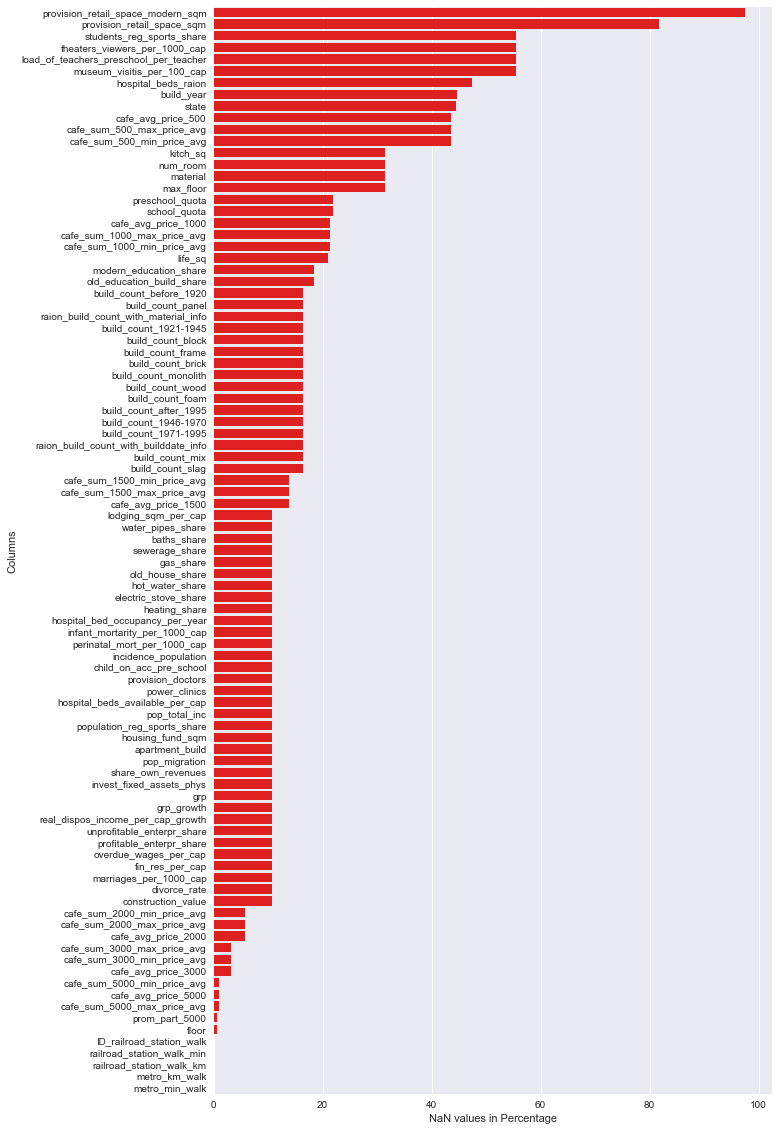

In [134]:
f, ax = plt.subplots(figsize=(10, 20))

df_nan = pd.DataFrame(train.isnull().sum()/len(train)*100).reset_index()
df_nan = df_nan.rename(columns={'index':'cols', 0:'nan_counts'})
df_nan = df_nan[df_nan.nan_counts !=0]
df_nan = df_nan.sort_values(ascending=False, by='nan_counts')

print 'Number of columns contain missing value: {}'.format(len(df_nan))

sns.barplot(y='cols', x='nan_counts', data=df_nan, color='red')
ax.set(xlabel='NaN values in Percentage', ylabel='Columns')

## Bad Data and Outliers

### House characteristic features

The House characterisitcs might be considere as the most important factor to determine the house price in region. The dataset include different related features:

- **`full_sq`**: total area in square meters, including loggias, balconies and other non-residential areas

- **`life_sq`**: living area in square meters, excluding loggias, balconies and other non-residential areas

- **`floor`**: for apartments, floor of the building

- **`max_floor`**: number of floors in the building

- **`material`**: wall material

- **`build_year`**: year built

- **`num_room`**: number of living rooms

- **`kitch_sq`**: kitchen area

- **`state`**: apartment condition

- **`product_type`**: owner-occupier purchase or investment

- **`sub_area`**: name of the district

The Investigation must be done on features separately and relatively to see some difficulties in the data, missing values, outliers and wrong relations.

### Total Area

Some odd things could be seen in the **`full_sq`** column:

- There are 2 houses with 0 tota area.

- There are 26 houses with less than 2.5 square meters total area.

- There is only 1 house with more than 1000 square meters total area.

In [135]:
train.full_sq.describe()

count    30471.000000
mean        54.214269
std         38.031487
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

In [136]:
print 'Number of 0-valued full_sq:       {}'.format(len(train[train.full_sq==0]))
print 'Number of less than 20 full_sq:   {}'.format(len(train[train.full_sq<20]))
print 'Number of less than 10 full_sq:   {}'.format(len(train[train.full_sq<10]))
print 'Number of less than 5 full_sq:    {}'.format(len(train[train.full_sq<5]))
print 'Number of less than 2.5 full_sq:  {}'.format(len(train[train.full_sq<2.5]))

print 'Number of full_sq=5326:           {}'.format(len(train[train.full_sq==5326]))
print 'Number of more than 500 full_sq:  {}'.format(len(train[train.full_sq>500]))
print 'Number of more than 1000 full_sq: {}'.format(len(train[train.full_sq>1000]))
print 'Number of more than 2000 full_sq: {}'.format(len(train[train.full_sq>2000]))
print 'Number of more than 5000 full_sq: {}'.format(len(train[train.full_sq>5000]))

Number of 0-valued full_sq:       2
Number of less than 20 full_sq:   143
Number of less than 10 full_sq:   29
Number of less than 5 full_sq:    26
Number of less than 2.5 full_sq:  26
Number of full_sq=5326:           1
Number of more than 500 full_sq:  6
Number of more than 1000 full_sq: 1
Number of more than 2000 full_sq: 1
Number of more than 5000 full_sq: 1


In [137]:
train[col_house_char][(train.full_sq==0) + (train.full_sq>500)].sort_values(by='full_sq')

,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,material,build_year,state,price_doc
17932,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4425000
24296,0,77.0,0.0,3.0,4.0,17.0,1.0,0.0,1.0,8167508
23715,603,NaN,1.0,2.0,16.0,18.0,1.0,NaN,NaN,6572700
5944,634,38.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,10200000
18341,634,NaN,0.0,2.0,3.0,17.0,1.0,NaN,NaN,6213200
22785,637,637.0,10.0,2.0,18.0,19.0,4.0,2016.0,1.0,4725142
2780,729,44.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,13250000
3527,5326,22.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,6868818


### Total Area vs. House Price

From the plot we can see a data point with more than 5000 square meters at very low price. That could be considered as an outlier.

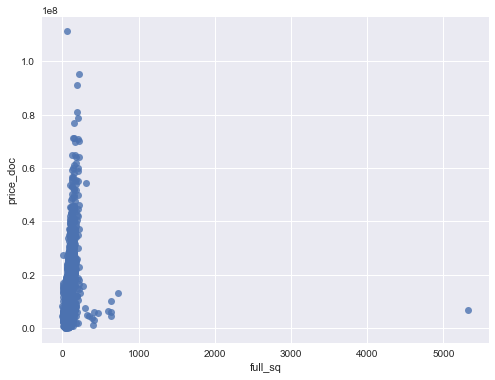

In [138]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(train.full_sq, train.price_doc, fit_reg=False)

### Life Area

Some odd things could be seen in the **`life_sq`** column:

- There is 45 houses with 0 total life area.

- The maximum life area is 7478 square meters while the maximum total area was 5326.

- There is 435 houses with less than 2.5 square meters total life area.

- There is only 1 house with more than 1000 square meters and 3 houses with more than 500 square meters total life area.

In [139]:
train.life_sq.describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [140]:
print 'Number of 0-valued life_sq:       {}'.format(len(train[train.life_sq==0]))
print 'Number of less than 10 life_sq:   {}'.format(len(train[train.life_sq<10]))
print 'Number of less than 5 life_sq:    {}'.format(len(train[train.life_sq<5]))
print 'Number of less than 2.5 life_sq:  {}'.format(len(train[train.life_sq<2.5]))

print 'Number of life_sq=7478:           {}'.format(len(train[train.life_sq==7478]))
print 'Number of more than 500 life_sq:  {}'.format(len(train[train.life_sq>500]))
print 'Number of more than 1000 life_sq: {}'.format(len(train[train.life_sq>1000]))
print 'Number of more than 2000 life_sq: {}'.format(len(train[train.life_sq>2000]))
print 'Number of more than 5000 life_sq: {}'.format(len(train[train.life_sq>5000]))

Number of 0-valued life_sq:       45
Number of less than 10 life_sq:   458
Number of less than 5 life_sq:    435
Number of less than 2.5 life_sq:  435
Number of life_sq=7478:           1
Number of more than 500 life_sq:  3
Number of more than 1000 life_sq: 1
Number of more than 2000 life_sq: 1
Number of more than 5000 life_sq: 1


In [141]:
train[col_house_char][(train.life_sq==0) + (train.life_sq>500)].sort_values(by='life_sq')

,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,material,build_year,state,price_doc
858,78,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,552312
21332,73,0.0,1.0,2.0,3.0,16.0,4.0,NaN,1.0,6640370
21445,37,0.0,0.0,1.0,9.0,0.0,6.0,2016.0,1.0,3166838
21453,48,0.0,0.0,1.0,7.0,9.0,1.0,0.0,1.0,3411777
21638,84,0.0,1.0,3.0,8.0,0.0,1.0,0.0,1.0,9377280
21677,42,0.0,1.0,1.0,15.0,24.0,1.0,0.0,1.0,5591751
21708,56,0.0,0.0,2.0,13.0,19.0,1.0,0.0,1.0,4278104
21809,37,0.0,0.0,1.0,18.0,19.0,1.0,2016.0,3.0,3116696
22158,63,0.0,0.0,2.0,14.0,17.0,1.0,0.0,1.0,7047839
22552,55,0.0,0.0,2.0,8.0,0.0,1.0,2015.0,1.0,4684993


### Life Area vs. House Price

From the plot we can see a data point with more than 5000 square meters life area at very low price. That could be considered as an outlier.

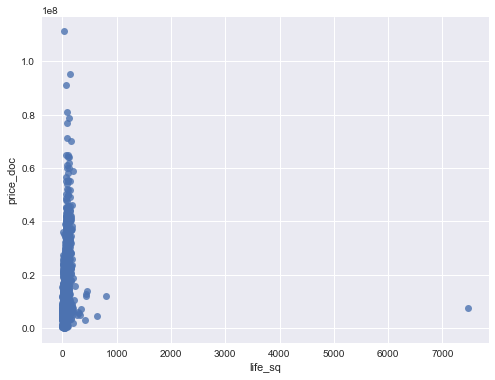

In [142]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(train.life_sq, train.price_doc, fit_reg=False)

### Kitchen Area

Some odd things could be seen in the `kitch_sq` column:

- There is 1381 houses with 0 total life area.

- The maximum kitchen area is 2014 square meters.

- There is 2 houses with more than 2000 square meters and 4 houses with more than 1000 square meters and 5 houses with 500 square meters kitchen area.

- For indices of [10368, 13117, 21415], it seems that the kitch_sq is in fact the build_year. 

- In [11520] the kitch_sq is abnormally large, even much larger than life_sq and full_sq, so it's better to drop this row or alternatively replace the kitch_sq with NaN value.

In [143]:
train.kitch_sq.describe()

count    20899.000000
mean         6.399301
std         28.265979
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: kitch_sq, dtype: float64

In [144]:
print 'Number of 0-valued kitch_sq:       {}'.format(len(train[train.kitch_sq==0]))
print 'Number of kitch_sq=2014:           {}'.format(len(train[train.kitch_sq==2014]))
print 'Number of more than 500 kitch_sq:  {}'.format(len(train[train.kitch_sq>500]))
print 'Number of more than 1000 kitch_sq: {}'.format(len(train[train.kitch_sq>1000]))
print 'Number of more than 2000 kitch_sq: {}'.format(len(train[train.kitch_sq>2000]))

Number of 0-valued kitch_sq:       1381
Number of kitch_sq=2014:           1
Number of more than 500 kitch_sq:  5
Number of more than 1000 kitch_sq: 4
Number of more than 2000 kitch_sq: 2


In [145]:
train[col_house_char][(train.kitch_sq>500)]

,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,material,build_year,state,price_doc
10368,79,41.0,2013.0,3.0,5.0,17.0,6.0,2013.0,1.0,7281225
11520,38,23.0,620.0,2.0,11.0,14.0,5.0,1971.0,2.0,6300000
13117,31,19.0,1970.0,1.0,5.0,1.0,1.0,NaN,3.0,3650000
21415,43,43.0,2014.0,1.0,3.0,1.0,1.0,2014.0,1.0,3801200
28734,31,16.0,1974.0,1.0,2.0,12.0,5.0,1972.0,3.0,1000000


### Kitchen Area vs. House Price

From the plot we can see a data point with more than 500 square meters and 4 data points with around 2000 square meters at very low prices. That could be considered as an outlier.

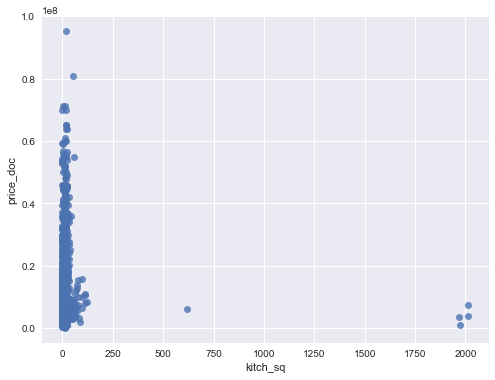

In [146]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(train.kitch_sq, train.price_doc, fit_reg=False)

### Relations between Total Area, Life Area and Kitchen Area

There are some simple relationships between these variables anticipated in the dataset:

- `full_sq` > `life_sq`
- `full_sq` > `kitch_sq`
- `life_sq` > `kitch_sq` (for isolated houses)

However it could be seen:

- There are 37 data with `life_sq` > `full_sq`

- There are 12 data with `kitch_sq` > `full_sq`

- There are 56 data with `kitch_sq` > `life_sq`

There is a possibility that in theses cases the employees had displaced these values. for example, one might be written the house life_sq in the full_sq column.

In [147]:
print 'Number of train data with full_sq  < life_sq:   %d' % (train.life_sq > train.full_sq).sum()
print 'Number of train data with full_sq  < kitch_sq:  %d' % (train.kitch_sq > train.full_sq).sum()
print 'Number of train data with kitch_sq < life_sq:   %d' % (train.kitch_sq > train.life_sq).sum()

Number of train data with full_sq  < life_sq:   37
Number of train data with full_sq  < kitch_sq:  12
Number of train data with kitch_sq < life_sq:   56


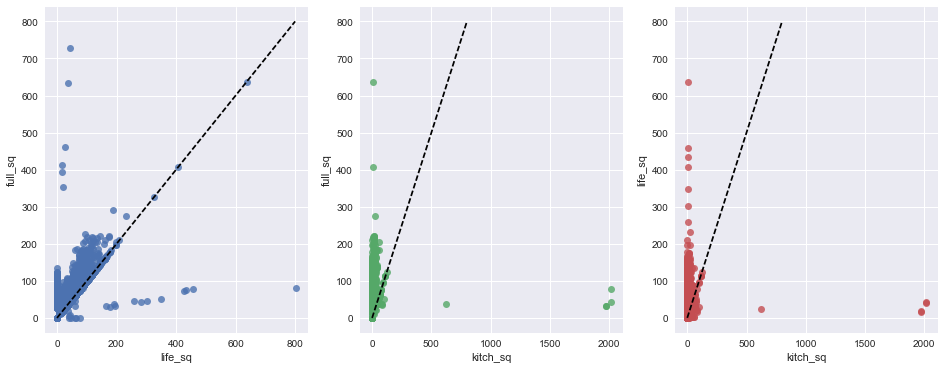

In [148]:
index = (train.life_sq<5000) & (train.full_sq<5000)

f, ax = plt.subplots(1,3,figsize=(16, 6))
sns.regplot(train.ix[index, 'life_sq'], train.ix[index, 'full_sq'], fit_reg=False, ax=ax[0])
ax[0].plot(np.linspace(0,800,100), np.linspace(0,800,100), '--', color='black')

sns.regplot(train.ix[index, 'kitch_sq'], train.ix[index, 'full_sq'], fit_reg=False, ax=ax[1])
ax[1].plot(np.linspace(0,800,100), np.linspace(0,800,100), '--', color='black')

sns.regplot(train.ix[index, 'kitch_sq'], train.ix[index, 'life_sq'], fit_reg=False, ax=ax[2])
ax[2].plot(np.linspace(0,800,100), np.linspace(0,800,100), '--', color='black')

### Number of Rooms

- There are 9 houses with more than 7 rooms and 18 houses with more than 6 rooms.

- For houses with more than 6 rooms, mostly the `full_sq`s are very small in comparison with number of rooms. At least we can put a seriouse suspicious for those values which have full_sq<100.



In [149]:
train.num_room.value_counts().sort_index()

0.0       14
1.0     7602
2.0     8132
3.0     4675
4.0      418
5.0       40
6.0        9
7.0        1
8.0        3
9.0        1
10.0       2
17.0       1
19.0       1
Name: num_room, dtype: int64

In [150]:
print 'Number of house with more than 7 rooms: {}'.format(len(train[train.num_room>6]))

Number of house with more than 7 rooms: 9


In [151]:
bad_index = train.num_room >= 6
train[col_house_char].ix[bad_index].sort_values(by='num_room')

,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,material,build_year,state,price_doc
10076,106,NaN,0.0,6.0,2.0,2.0,1.0,2014.0,1.0,4980000
28622,129,83.0,11.0,6.0,2.0,7.0,2.0,1910.0,2.0,29700000
28081,219,101.0,16.0,6.0,2.0,2.0,4.0,2014.0,1.0,18000000
24007,92,68.0,7.0,6.0,4.0,6.0,2.0,1929.0,3.0,15400000
19390,57,37.0,6.0,6.0,7.0,9.0,1.0,1969.0,2.0,8000000
15145,215,134.0,7.0,6.0,10.0,10.0,2.0,2003.0,1.0,23000000
13242,170,123.0,14.0,6.0,4.0,4.0,2.0,NaN,NaN,34800000
16743,303,NaN,0.0,6.0,32.0,32.0,1.0,NaN,NaN,54212936
29656,211,162.0,19.0,6.0,5.0,5.0,2.0,1914.0,3.0,70000000
18990,145,109.0,9.0,7.0,5.0,6.0,2.0,1936.0,3.0,25500000


### Maximum Floor vs. FLoor

There is another logical relationship between house characteristics that must be held in the dataset:

- `max_floor` > `floor`

Unfortunately there are 1493 data with wrong relation: `max_floor` < `floor`

In [152]:
print 'Number of train data with floor > max_floor:   %d' % (train.floor > train.max_floor).sum()

Number of train data with floor > max_floor:   1493


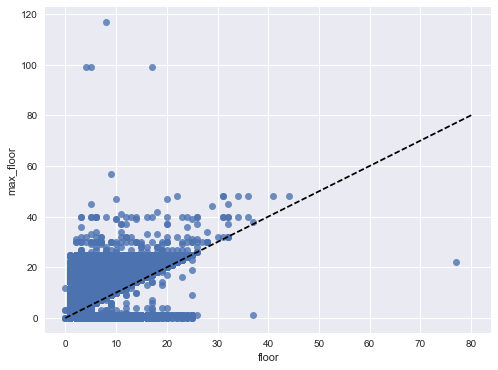

In [153]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(train.floor, train.max_floor, fit_reg=False)
sns.plt.plot(np.linspace(0,80,100), np.linspace(0,80,100), '--', color='black')

### State

The state could get integer values of 1-4, therefor the state = 36 is not acceptable. The row of data containing this value either must be dropped out or considered as missing value.

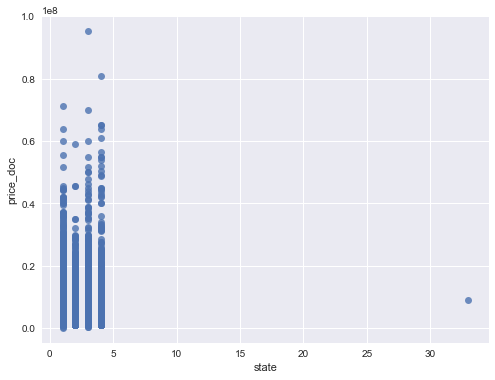

In [154]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(train.state, train.price_doc, fit_reg=False)

### Build year

There is some values of build_year that have big differences to others. Some of them can be dropped out with no concern, however some other must be modified because they include a large proportion of dataset.

- The most important values are the ones with the build_year of 0 and 1, as the dataset includes 898 rows with thses values.  Fortunately there is a reasonable assumption to take these vlues as the house' age instead of its build_year.

- The build_year=20052009 can be considered as a range of 2005-2009 and alternatively replcaed with the mid-range.

- Other values including build_year=[3, 20, 71, 215, 4965] can be dropped out or replaced with NaN.

In [155]:
train.build_year.value_counts().sort_index()

0.0           530
1.0           368
3.0             2
20.0            1
71.0            1
215.0           1
1691.0          1
1860.0          2
1876.0          1
1886.0          1
1890.0          5
1895.0          1
1896.0          2
1900.0          2
1904.0          1
1905.0          1
1906.0          1
1907.0          2
1910.0          5
1911.0          1
1912.0          5
1914.0          3
1915.0          5
1917.0         16
1920.0          1
1924.0          3
1925.0          1
1926.0          8
1927.0         10
1928.0         12
             ... 
1991.0         93
1992.0        139
1993.0        115
1994.0        160
1995.0        149
1996.0        162
1997.0        139
1998.0        141
1999.0        125
2000.0        130
2001.0        177
2002.0        214
2003.0        193
2004.0        220
2005.0        176
2006.0        242
2007.0        219
2008.0        234
2009.0        176
2010.0        132
2011.0        162
2012.0        233
2013.0        464
2014.0        919
2015.0    

## Handling Categorical data

Thereare 19 categorical columns in the dataset. Most of the machine learning algorithms are not compatible with categorical data. There are different ways to deal with this difficulty:

1- Label Encoding: Encode labels with value between 0 and n_classes-1.

2- One-Hot Encoding: Encode categorical integer features using a one-hot aka one-of-K scheme. This estimator transforms each categorical feature with m possible values into m binary features, with only one active.


In [156]:
print 'Number of Categorical features: %d' % len(train.columns[train.dtypes=='object'])

Number of Categorical features: 18


In [157]:
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[c].values)) 
        train[c] = lbl.transform(list(train[c].values))

## Handling Missing data

After all the dataset has a lot of missing values and also we might add more to it. A lot of different strategies are accessible to handle the missing values and outliers:

1- drop-out missing values: When we have a very few outliers or missing values it could be acceptable, but in most of the cases that's a very bad idea.

2- Independant Imputation of columns: We can fill missing values in each column with a function (example; mean, median) of that column independantly. It does very fast but not consider the correlations with other variables.

3- Regression Imputation: We can apply some Regression models such as Linear or knn Regression to estimate the missing values with respect to correlated features. It's more precise but very slow method.

4- Decision Tree based Algorithm: Decision tree has the potential to handle with missing values. The best Machine Learning algorithm to do this is the `Extreme Gradient boosting` which has been recently published. `xgboost` is a package of libraries that implemented this algorithm.

## Feature Engineering

A very effective way to boost up the model perforemance is to use the art of Feature Engineering. That's to some extent heuristic, but it worth considering. Here I extended the `timestamp` column into different variables, such as, `year`, `month`, `quarter`, etc. This is because the hosuse price has a periodic characteristic with respect to month, quarter, year, etc. Therefor, these features could guide the model to better learned.

Another important feature that could be extracted from the dataset is the building age. It's very effective factor to determine the house price. This feature is simply computed with the subtraction of transaction year and build year.

Also It could be useful to add some relative features , such the ratio of **`full_sq`** and **`life_sq`**, **`kitch_sq`** and **`life_sq`**, **`life_sq`** and **`num_room`**.

In [158]:
train['year'] = train['timestamp'].dt.year
train['month'] = train['timestamp'].dt.month
train['day'] = train['timestamp'].dt.day
train['quarter'] = train['timestamp'].dt.quarter
train['year_quarter'] = train['timestamp'].dt.to_period('Q')
train['year_month'] = train['timestamp'].dt.to_period('M')

train['age'] = train['timestamp'].dt.year - train['build_year']

train['life_rel'] = train['life_sq']/train['full_sq']
train['kitch_rel'] = train['kitch_sq']/train['life_sq']
train['room_sq'] = train['life_sq']/train['num_room']

# Exploratory Data Analysis

In [159]:
import pandas as pd
import numpy as np
import scipy as scp
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import sklearn 
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
import statsmodels.api as sm
import xgboost as xgb

%matplotlib inline
matplotlib.style.use('ggplot')
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings(action='ignore')

In [160]:
train = pd.read_csv('./data/Sber Bank/train.csv')
macro = pd.read_csv('./data/Sber Bank/macro.csv')
train = pd.merge(train, macro, on='timestamp')

In [161]:
train['timestamp'] = pd.to_datetime(train['timestamp'])

train.ix[train.full_sq <= 6, 'full_sq'] = np.nan
train.ix[train.life_sq <= 6, 'life_sq'] = np.nan

train.ix[train.full_sq > 2000, 'full_sq'] = np.nan
train.ix[train.life_sq > 2000, 'life_sq'] = np.nan

bad_index = [13117]
train.ix[bad_index, 'build_year'] = train.ix[bad_index, 'kitch_sq']
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = [10368, 11520, 13117, 21415, 28734]
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = train.ix[(train.num_room>=6) & (train.full_sq<100)].index
train.ix[bad_index, 'num_room'] = np.nan

bad_index = train.kitch_sq > train.life_sq
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = train.kitch_sq > train.full_sq
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = train.life_sq > train.full_sq
train.ix[bad_index, 'life_sq'] = np.nan

bad_index = train.floor > train.max_floor
train.ix[bad_index, 'floor'] = np.nan

train.ix[train.state > 30, 'state'] = np.nan

train.ix[train.ecology=='no data', 'ecology'] = np.nan

train.timestamp = pd.to_datetime(train.timestamp)
bad_index = (train.build_year == 0)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year
bad_index = (train.build_year == 1)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year-1
bad_index = (train.build_year == 3)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year-3
train.ix[train.build_year < 1600, 'build_year'] = np.nan
train.ix[train.build_year > 2018, 'build_year'] = np.nan

In [162]:
train['age'] = train['timestamp'].dt.year - train['build_year']

train['price_per_sq'] = train['price_doc']/train['full_sq']

train.ix[train.price_per_sq > 6e5, 'price_per_sq'] = np.nan

df = train.groupby('sub_area')['price_per_sq'].mean().reset_index()
df = df.rename(columns={'price_per_sq':'price_per_sq_sub_area'})
train = train.merge(df, on='sub_area')

## Region

Maybe the first and major factor in determining a house price is the region located in. In the figure below that could be seen that, the average per squared of houses encompasses a wide range from 20000 RUB in **`Poselenie Klenovekoe`** to more than 250000 RUB in **`Hamovniki`**. Notice that here per squared price (total price per total house area) is used instead of total house price to not considering the effect of total house area. 

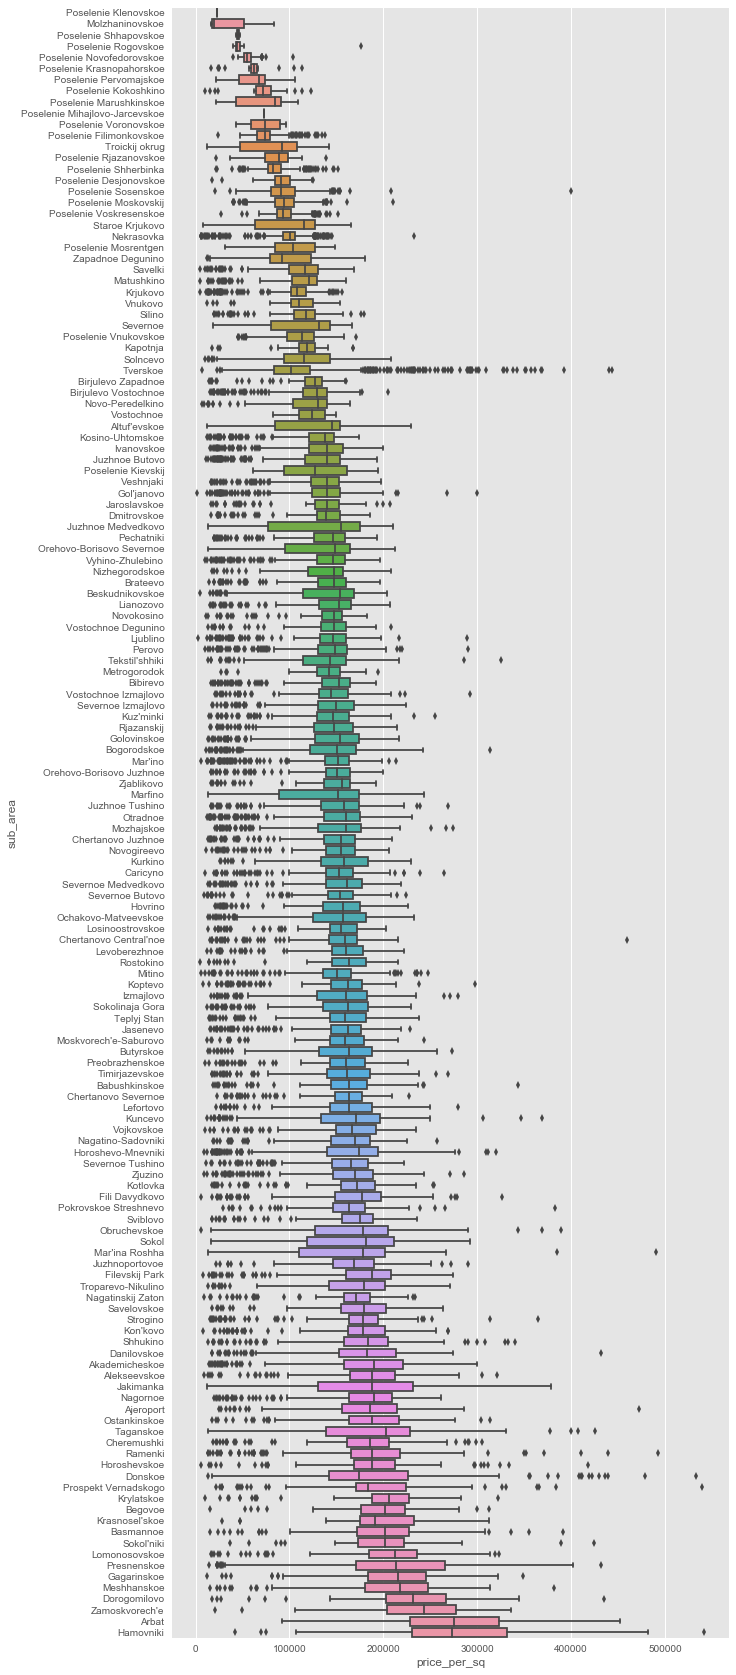

In [163]:
df = train[['sub_area', 'price_per_sq_sub_area', 'price_per_sq']].sort_values(by='price_per_sq_sub_area')

fig, ax = plt.subplots(figsize=[10,30])

sns.boxplot(df['price_per_sq'], df['sub_area'])

## House Characteristics



### State

Naturally that's expected for houses with better condition to have hogher prices. That could be clearly seen in the figure below. The average per squared house price for the best conditioned apartement is more than 175000 RUB, however this value for worst stated house is less than 125000 RUB.

There is another thing that must be noted in the figure that, the number fo house that dealed is much lower than other types. Despite more 5500 house are dealt for house with the states of 1-3, however, less than 500 transactions are recorded for state-4 houses. That might be related to their much higher costs in comaprison with the economic situation of people.

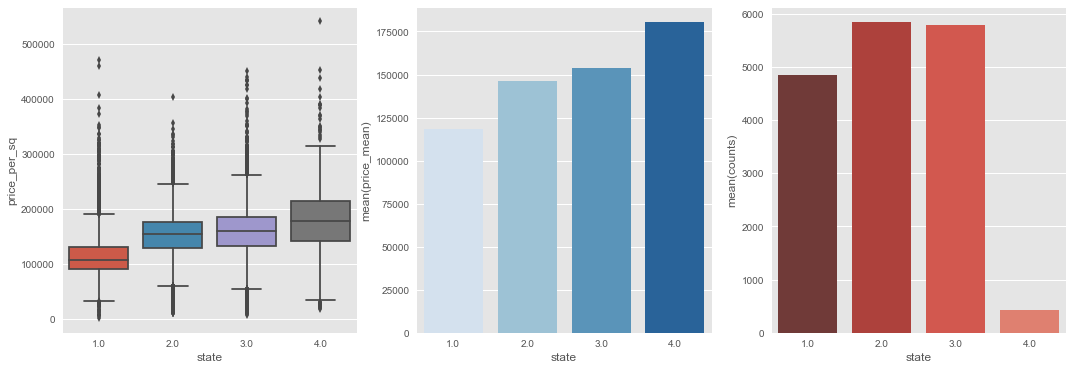

In [164]:
fig, ax = plt.subplots(1,3,figsize=[18,6])

df1 = train.groupby('state')[['price_per_sq']].size().reset_index().rename(columns={0:'counts'})
df2 = train.groupby('state')[['price_per_sq']].mean().reset_index().rename(columns={'price_per_sq':'price_mean'})
df = pd.merge(df1, df2, on='state')

sns.boxplot(train['state'], train['price_per_sq'], ax=ax[0])
sns.barplot(x='state', y='price_mean', data=df, palette='Blues', ax=ax[1])
sns.barplot(x='state', y='counts', data=df, palette='Reds_d', ax=ax[2])

### AGE

We expect for older houses to have lower per squared house. However, if they are located in higher level regions, then this assupmtion is not true. From the figures, the regression line shows that generally, the older houses have higher prices. On the other hand, we can divide each per squared house price to the average per squared prices of the houses in that region, and we name it the **region price ratio**. This parameter tries to compensate the effect of the region in house price. Now the second figure shows that the region price ratio is not effected by the age of the houses.

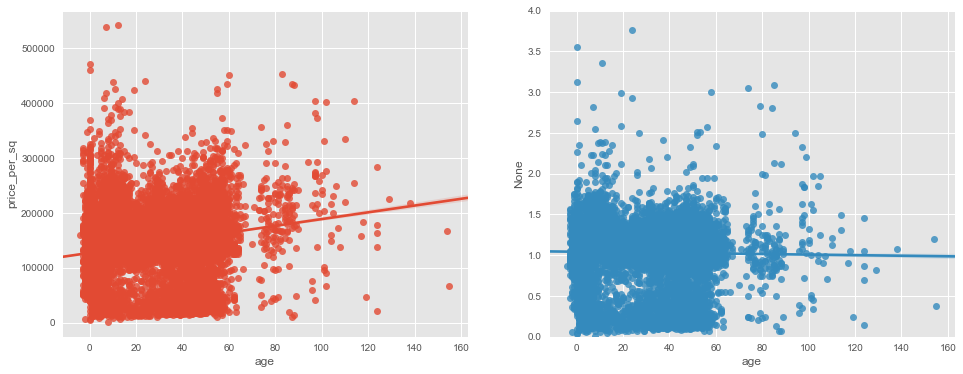

In [165]:
fig, ax = plt.subplots(1,2,figsize=[16,6])

df = train[['age', 'full_sq', 'price_per_sq', 'price_doc', 'price_per_sq_sub_area']]
df[df.age>300] = np.nan

sns.regplot(df['age'], df['price_per_sq'], ax=ax[0])

sns.regplot(df['age'], df['price_per_sq']/df['price_per_sq_sub_area'], ax=ax[1])
_ = ax[1].set_ylim(0,4)

### Floor

In general view we can state that the houses in higher floors are more expensive by average. This is what many times heared in real-estate.

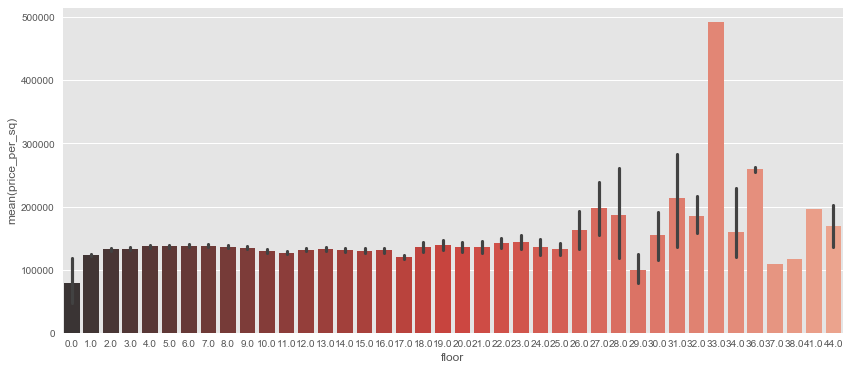

In [166]:
fig, ax = plt.subplots(figsize=[14,6])
sns.barplot(train['floor'], train['price_per_sq'], palette='Reds_d')

### Wall Material

There is no enough information on the meaning of different Wall Material's type. However we can see some  differences between them. The most notable thing that could be seen is that, most of the houses (more than 50%) are made by the wall material type-1.

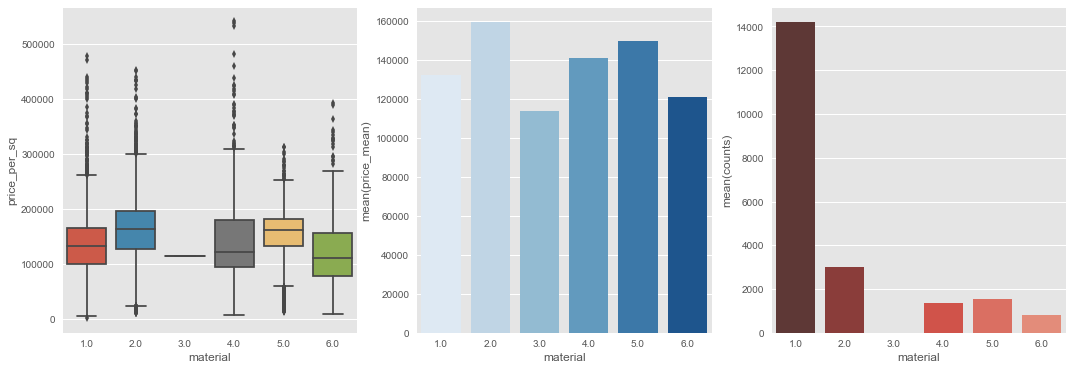

In [167]:
fig, ax = plt.subplots(1,3,figsize=[18,6])


df1 = train.groupby('material')[['price_per_sq']].size().reset_index().rename(columns={0:'counts'})
df2 = train.groupby('material')[['price_per_sq']].mean().reset_index().rename(columns={'price_per_sq':'price_mean'})
df = pd.merge(df1, df2, on='material')

sns.boxplot(train['material'], train['price_per_sq'], ax=ax[0])
sns.barplot(x='material', y='price_mean', data=df, palette='Blues', ax=ax[1])
sns.barplot(x='material', y='counts', data=df, palette='Reds_d', ax=ax[2])

### Product type

On the view point of **`Product type`** (**_Investment_** or **_Owner Occupier_**), it's concluded that, the investment type houses are more expensive (15% more) and dealt more (30% more).

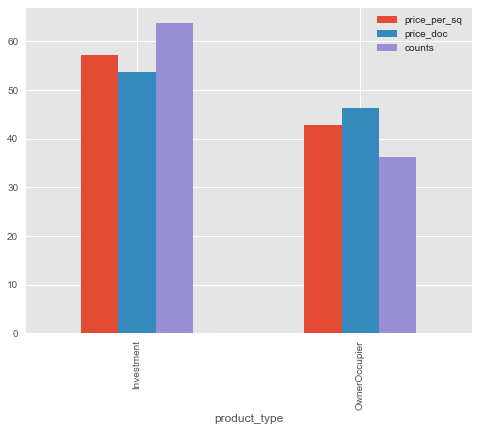

In [168]:
fig, ax = plt.subplots(figsize=[8,6])
df = train[['product_type', 'price_per_sq', 'price_doc']].groupby('product_type').mean()
df['counts'] = (train[['product_type', 'price_per_sq']].groupby('product_type').size())
df = df/df.sum() * 100
df.plot(kind='bar', ax=ax)

## Shopping Center

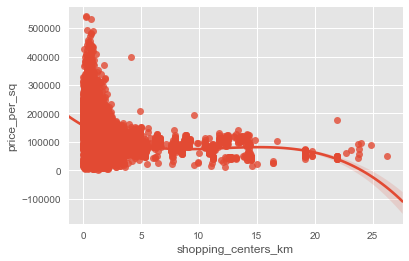

In [169]:
sns.regplot(train['shopping_centers_km'], train['price_per_sq'], order=3)

## Demographic

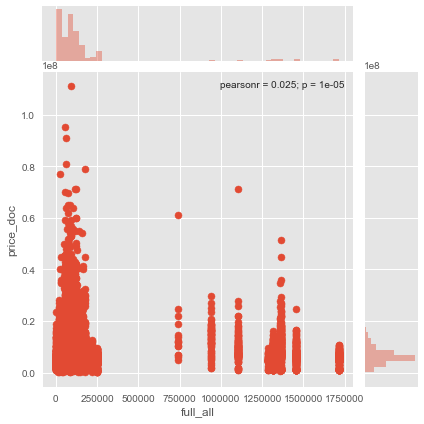

In [170]:
sns.jointplot(train['full_all'], train['price_doc'])

## Culture

From the figure below, maybe it's better to say the mosques are built in higher prices region by average. Also, it could be said that the houses nearer to mosques are more valueable averagely.

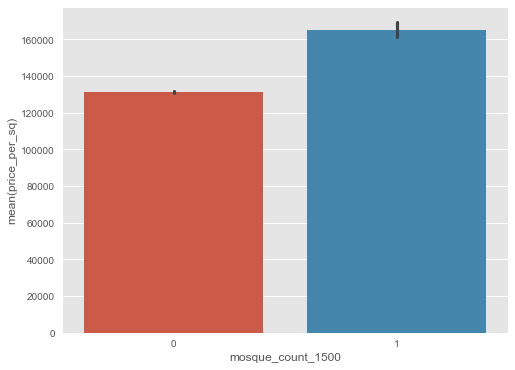

In [171]:
fig, ax = plt.subplots(figsize=[8,6])
sns.barplot(train['mosque_count_1500'], train['price_per_sq'])

Being near the curches has not a notable proficiency, but also has a slightly contrary effect.

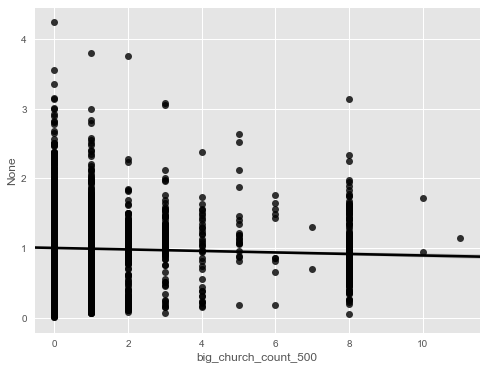

In [172]:
fig, ax = plt.subplots(figsize=[8,6])
sns.regplot(train['big_church_count_500'], train['price_per_sq']/train['price_per_sq_sub_area'], color='black')

## Industry

### Nuclear Reactor

Although the the figure shows about 10% higher prices for houses nearer to Nuclear Reactor, Thermal Power plant, but we must notice that these are less than 10% of all the cases.

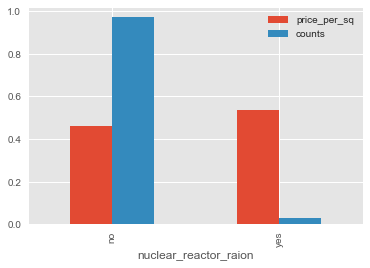

In [173]:
df = train[['nuclear_reactor_raion', 'price_per_sq']].groupby('nuclear_reactor_raion').mean()
df['counts'] = train[['nuclear_reactor_raion', 'price_per_sq']].groupby('nuclear_reactor_raion').size()
df = df/df.sum()
df.plot(kind='bar')

### Thermal Power Plant

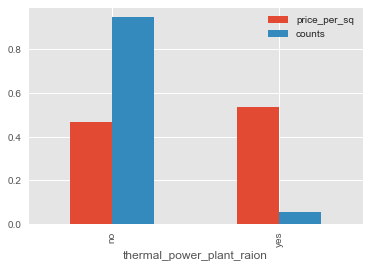

In [174]:
df = train[['thermal_power_plant_raion', 'price_per_sq']].groupby('thermal_power_plant_raion').mean()
df['counts'] = train[['thermal_power_plant_raion', 'price_per_sq']].groupby('thermal_power_plant_raion').size()
df = df/df.sum()
df.plot(kind='bar')

### Incineration

The houses nearer the Incinerations are chipper naturally, also they include around 10% of the whole Market.

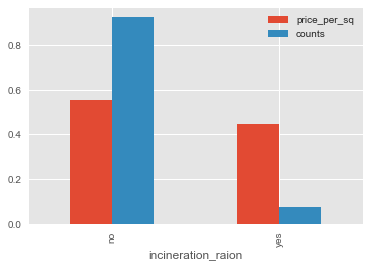

In [175]:
df = train[['incineration_raion', 'price_per_sq']].groupby('incineration_raion').mean()
df['counts'] = train[['incineration_raion', 'price_per_sq']].groupby('incineration_raion').size()
df = df/df.sum()
df.plot(kind='bar')

### Power Transmission Line

The regression line in the figure below has a negative slope that means, the closer to the Power Transmission Lines the lower house prices.

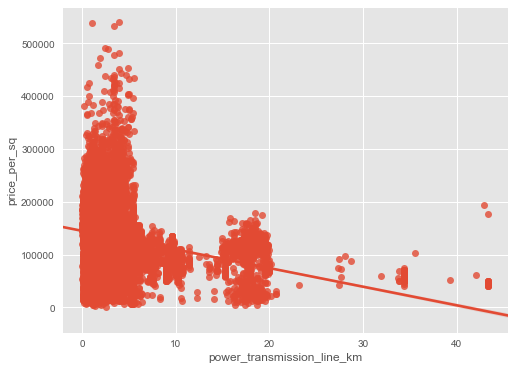

In [176]:
fig, ax = plt.subplots(figsize=[8,6])
sns.regplot(train['power_transmission_line_km'], train['price_per_sq'])

## Transportation

In general there is an obviouse effect that being near the Transportation facilities is benefit. It could be seen that the houses closer to TTRs, Subways, etc, are more expensive. These are shown in the figures below.

### Moscow Circle Auto Road

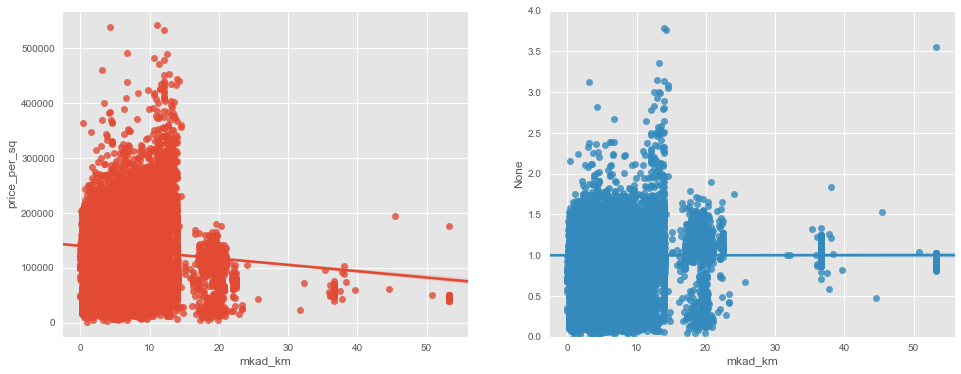

In [177]:
fig, ax = plt.subplots(1,2,figsize=[16,6])
sns.regplot(train['mkad_km'], train['price_per_sq'], ax=ax[0])
sns.regplot(train['mkad_km'], train['price_per_sq']/train['price_per_sq_sub_area'], ax=ax[1])
_ = ax[1].set_ylim(0,4)

### Third Transport Ring

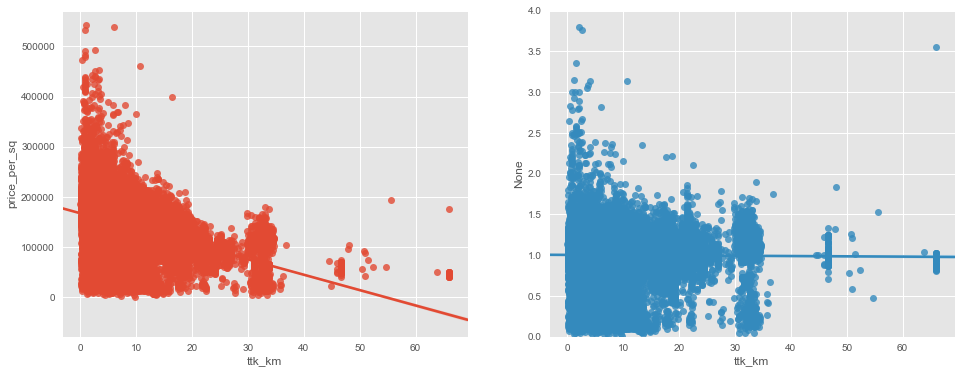

In [178]:
fig, ax = plt.subplots(1,2,figsize=[16,6])
sns.regplot(train['ttk_km'], train['price_per_sq'], ax=ax[0])
sns.regplot(train['ttk_km'], train['price_per_sq']/train['price_per_sq_sub_area'], ax=ax[1])
_ = ax[1].set_ylim(0,4)

### Garden Ring

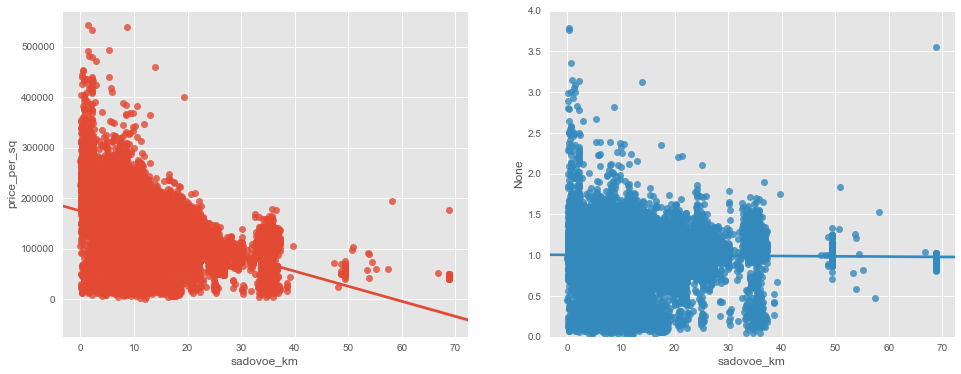

In [179]:
fig, ax = plt.subplots(1,2,figsize=[16,6])
sns.regplot(train['sadovoe_km'], train['price_per_sq'], ax=ax[0])
sns.regplot(train['sadovoe_km'], train['price_per_sq']/train['price_per_sq_sub_area'], ax=ax[1])
_ = ax[1].set_ylim(0,4)

### Subway

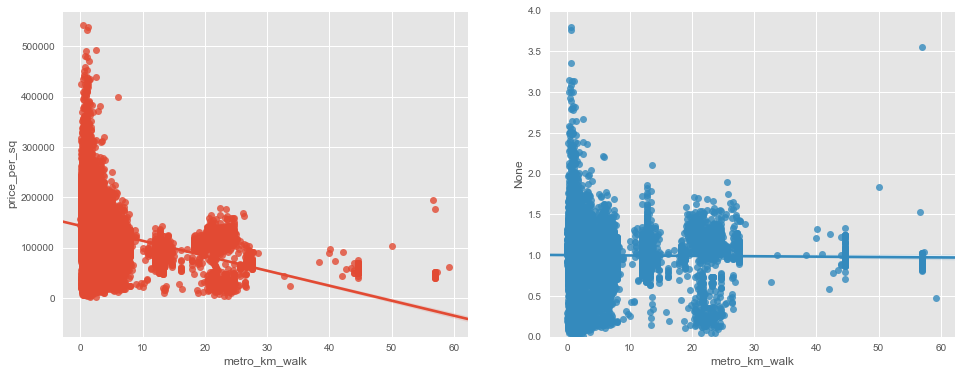

In [180]:
fig, ax = plt.subplots(1,2,figsize=[16,6])
sns.regplot(train['metro_km_walk'], train['price_per_sq'], ax=ax[0])
sns.regplot(train['metro_km_walk'], train['price_per_sq']/train['price_per_sq_sub_area'], ax=ax[1])
_ = ax[1].set_ylim(0,4)

## Kremlin

As seen in the figure, with respect to the negative slope of the regression line, the houses closer to the city center are more expensive.

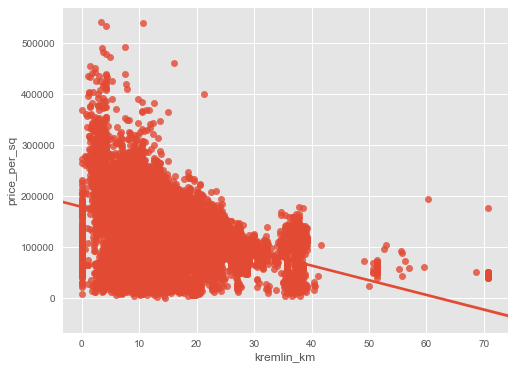

In [181]:
fig, ax = plt.subplots(figsize=[8,6])
sns.regplot(train['kremlin_km'], train['price_per_sq'])
#sns.regplot(train['kremlin_km'], train['price_per_sq']/train['price_per_sq_sub_area'], ax=ax[1])
#_ = ax[1].set_ylim(0,4)

## Public Healthcare

Being near to the Public Healthcare is a benefit for neighborhood houses. It could be seen that per-squared price is negatively related to the distance from public healthcare.

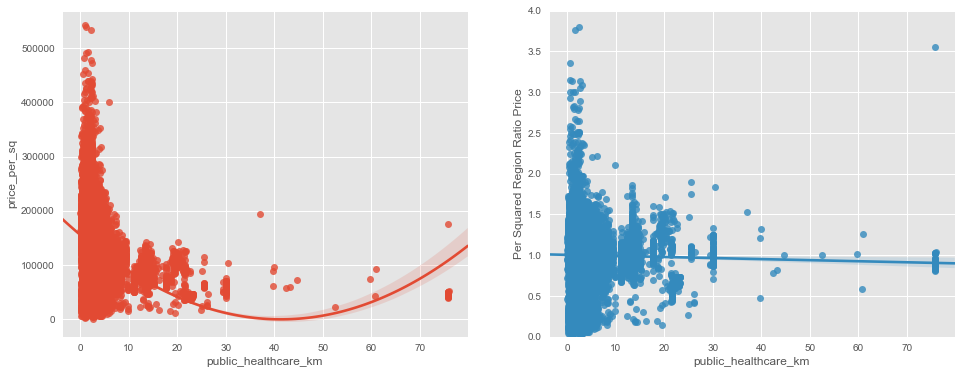

In [186]:
fig, ax = plt.subplots(1,2,figsize=[16,6])
sns.regplot(train['public_healthcare_km'], train['price_per_sq'], ax=ax[0], order=2)
sns.regplot(train['public_healthcare_km'], train['price_per_sq']/train['price_per_sq_sub_area'], ax=ax[1])
_ = ax[1].set_ylim(0,4)
ax[1].set_ylabel('Per Squared Region Ratio Price')

### Ecology



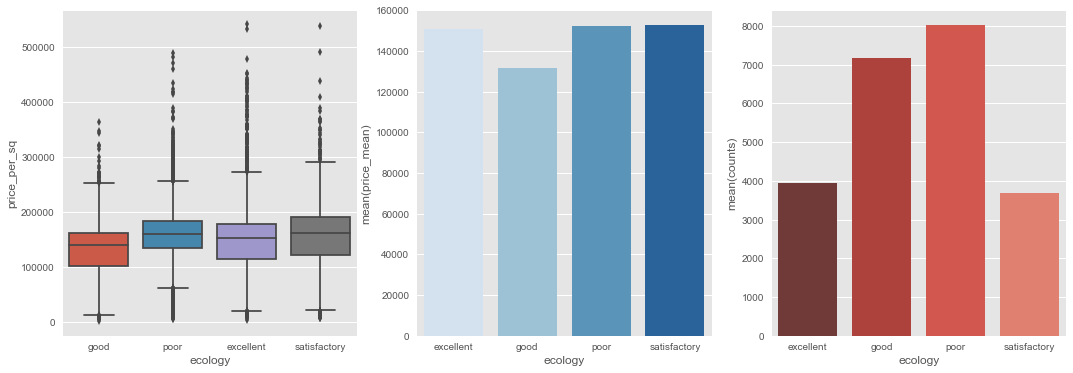

In [11]:
fig, ax = plt.subplots(1,3,figsize=[18,6])

df1 = train.groupby('ecology')[['price_per_sq']].size().reset_index().rename(columns={0:'counts'})
df2 = train.groupby('ecology')[['price_per_sq']].mean().reset_index().rename(columns={'price_per_sq':'price_mean'})
df = pd.merge(df1, df2, on='ecology')

sns.boxplot(train['ecology'], train['price_per_sq'], ax=ax[0])
sns.barplot(x='ecology', y='price_mean', data=df, palette='Blues', ax=ax[1])
sns.barplot(x='ecology', y='counts', data=df, palette='Reds_d', ax=ax[2])

### Green Zone

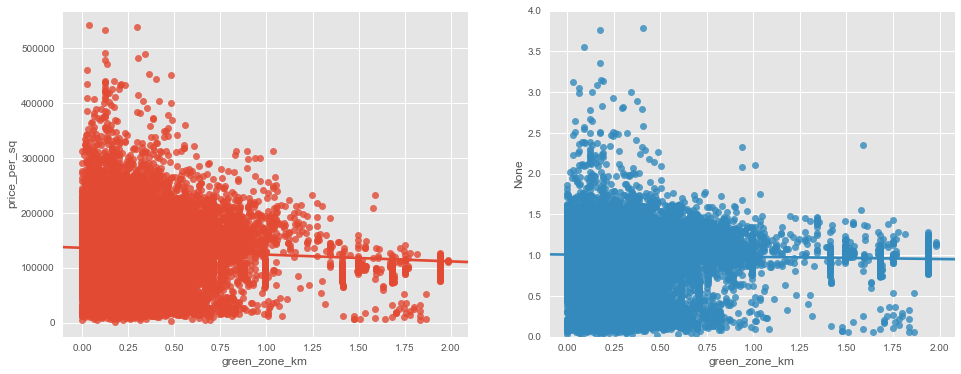

In [12]:
fig, ax = plt.subplots(1,2,figsize=[16,6])
sns.regplot(train['green_zone_km'], train['price_per_sq'], ax=ax[0])
sns.regplot(train['green_zone_km'], train['price_per_sq']/train['price_per_sq_sub_area'], ax=ax[1])
_ = ax[1].set_ylim(0,4)

### Shopping Mall

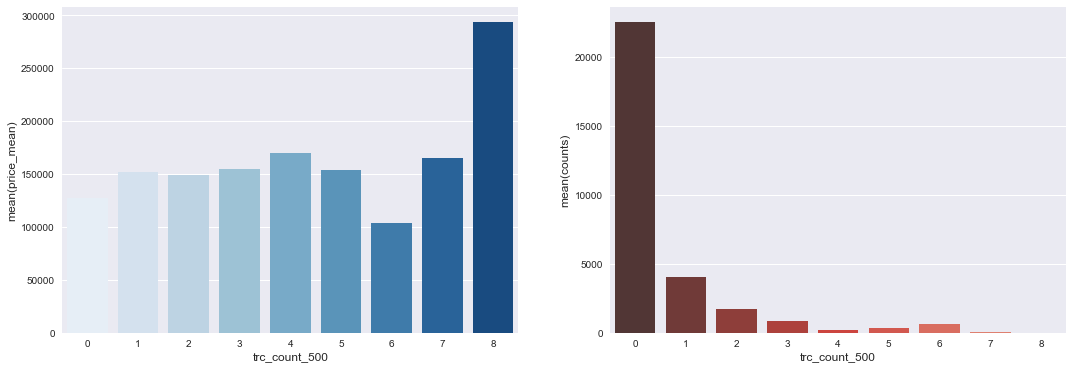

In [33]:
fig, ax = plt.subplots(1,2,figsize=[18,6])

df1 = train.groupby('trc_count_500')[['price_per_sq']].size().reset_index().rename(columns={0:'counts'})
df2 = train.groupby('trc_count_500')[['price_per_sq']].mean().reset_index().rename(columns={'price_per_sq':'price_mean'})
df = pd.merge(df1, df2, on='trc_count_500')

#sns.boxplot(train['trc_count_500'], train['price_per_sq'], ax=ax[0])
sns.barplot(x='trc_count_500', y='price_mean', data=df, palette='Blues', ax=ax[0])
sns.barplot(x='trc_count_500', y='counts', data=df, palette='Reds_d', ax=ax[1])

## Time series

one of the most useful analysis in economical data is the Time series analysis. Here we could seek the economical parameters and the market characteristics through the time. Also we can see some noable changes that coluld be related to some different happenings.

- From the first figure, it seems that, generaly, the house prices has increased most of the times, except for a period of time in ..., that it deeply decreased.

- The average of the house prices has inreased annualy. In this period the annual average growth in house prices is around 6%.

- On the other hand, in the period of 2012-2014, the Number of Transactions in the House Market has a noatable growth, 40% for 201 and 70% for 2014.

- A very interesting thing could be seen in the 4th figure, the quarterly average prices. We can see an orderly seasonal characteristics in the House prices. For 3 successive yars, reaches to its highest value in Summers, and after that it goes down. This is a very important thing that culd be used in learning the regression model.

(0, 150931.84134612279)

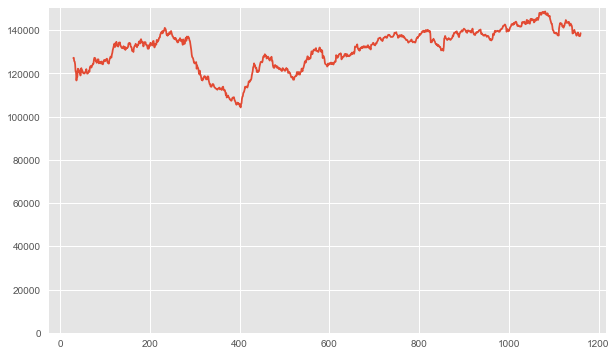

In [277]:
fig, ax = plt.subplots(figsize=(10, 6))
df = train[['timestamp', 'price_per_sq']].groupby('timestamp').mean().reset_index()
plt.plot(df.price_per_sq.rolling(window=30).mean())
plt.ylim(0,)

[<matplotlib.text.Text at 0x17722be0>, <matplotlib.text.Text at 0x177140f0>]

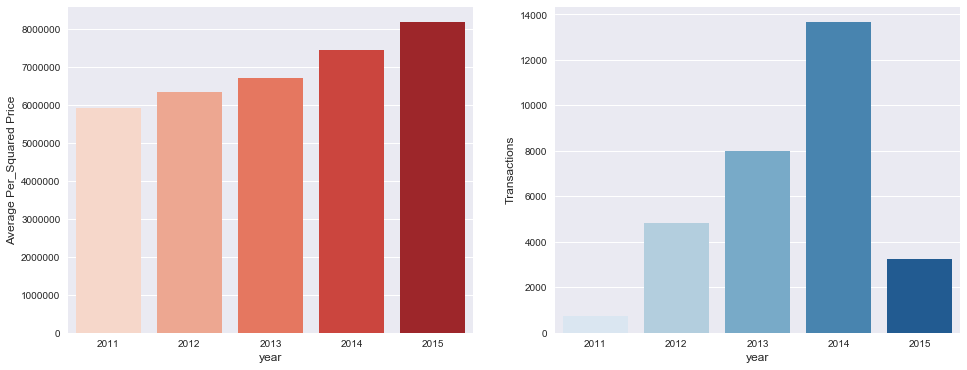

In [47]:
df1 = train.groupby(train.timestamp.dt.year).size().reset_index().rename(columns={0:'counts'})
df2 = train.groupby(train.timestamp.dt.year).mean()[['price_per_sq', 'price_doc']].reset_index()
df = pd.merge(df1, df2, on='timestamp')

fig, ax = plt.subplots(1,2,figsize=(16, 6))
sns.barplot(df.timestamp, df.price_doc, ax=ax[0], palette='Reds')
ax[0].set(xlabel='year', ylabel='Average House Price')
sns.barplot(df.timestamp, df.counts, ax=ax[1], palette='Blues')
ax[1].set(xlabel='year', ylabel='Transactions')

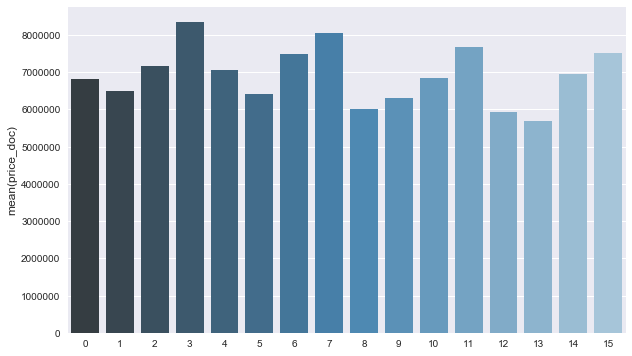

In [54]:
df = train[['timestamp', 'price_doc']]
df['year'] = df.timestamp.dt.year
df['quarter'] = df.timestamp.dt.quarter
df = df.drop('timestamp', axis=1)

df = df.groupby(['quarter', 'year']).mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(range(len(df)), df.price_doc, palette='Blues_d')
ax.legend(bbox_to_anchor=(1, 0.6))

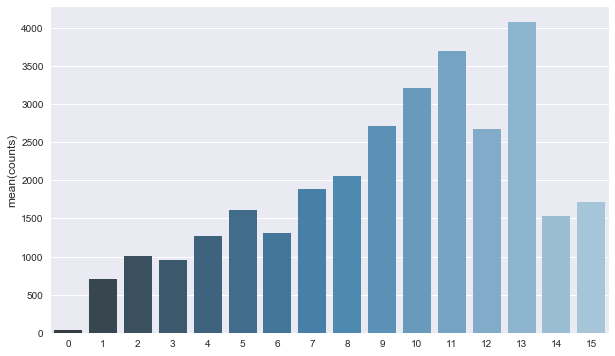

In [35]:
df = train[['timestamp', 'price_doc']]
df['year'] = df.timestamp.dt.year
df['quarter'] = df.timestamp.dt.quarter
df = df.drop('timestamp', axis=1)

df = df.groupby(['quarter', 'year']).size().reset_index().rename(columns={0:'counts'}).sort_values(by='year')

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(range(len(df)), df.counts, palette='Blues_d')
ax.legend(bbox_to_anchor=(1, 0.6))

## Economical Parameters

There are a lot of economical parameters, that many of theme are correlated to each other, and have an effective impact on variations in markets. The most important parameters, that also people often talk about them, are the exchange rate, Inflation rate, average salary and House Funding. Here we can see the variations of these parameters over the time and also their correlations with average of the house prices.

- The exchange rate USD-RUBL has increased gently for a long time, until 2015 that it abruptly jumped up around 100% in a period of 3 months. This might be related to EU and US sanctions against Russia. Despite the USD-RUBL exchange rate has a positive relation on house prices, however, we don't see an abruption in the sale prices.

- Inflation rate is one the most important parameter that prices are expected to change with. It can also show economical stability during the time. As seen in the figure, the Inflation growth rate has been arount 6.7% for more than 3 years, until 2015, that increases up to 30% for a period of 4 years. However, it returned back to the 6% rate after 4 months.

- The average salary had been growing for 3 years with around 10% annualy. However we see that the average salary growth is only 5% in 2015. 

- Housing Funds are mostly used to shake the house maket. This could increase the number of transactions. Maybe this is why a big jump of Housing Funds has been occured in 2012.

In [27]:
df_day = train.groupby('timestamp')\
    [['usdrub', 'salary', 'cpi', 'fixed_basket', 'housing_fund_sqm', 'price_doc', 'price_per_sq', 'price_per_sq_sub_area']].\
    mean().reset_index().sort_values(by='timestamp').\
    rename(columns={'price_doc':'price_doc_mean', 
                    'price_per_sq':'price_per_sq_mean', 
                    'price_per_sq_sub_area':'price_per_sq_region_mean'})

df_day = pd.merge(df_day, train.groupby('timestamp')[['price_doc', 'price_per_sq', 'price_per_sq_sub_area']].\
              std().reset_index().sort_values(by='timestamp'), on='timestamp').\
              rename(columns={'price_doc':'price_doc_std', 
                              'price_per_sq':'price_per_sq_std', 
                              'price_per_sq_sub_area':'price_per_sq_region_std'})
    
df_day = pd.merge(df_day, train.groupby('timestamp').size().reset_index().sort_values(by='timestamp'), on='timestamp').\
        rename(columns={0:'counts'})

df_day.fillna(0, inplace=True)

#df_day

In [6]:
df_year_month = train.groupby(train.timestamp.dt.to_period('M'))\
    [['usdrub', 'salary', 'cpi', 'fixed_basket', 'housing_fund_sqm', 'price_doc', 'price_per_sq', 'price_per_sq_sub_area']].\
    mean().reset_index().sort_values(by='timestamp').\
    rename(columns={'price_doc':'price_doc_mean', 
                    'price_per_sq':'price_per_sq_mean', 
                    'price_per_sq_sub_area':'price_per_sq_region_mean'})

df_year_month = pd.merge(df_year_month, train.groupby(train.timestamp.dt.to_period('M'))
                         [['price_doc', 'price_per_sq', 'price_per_sq_sub_area']].\
                         std().reset_index().sort_values(by='timestamp'), on='timestamp').\
                         rename(columns={'price_doc':'price_doc_std', 
                                         'price_per_sq':'price_per_sq_std', 
                                         'price_per_sq_sub_area':'price_per_sq_region_std'})
    
df_year_month = pd.merge(df_year_month, train.groupby(train.timestamp.dt.to_period('M')).size().\
                         reset_index().sort_values(by='timestamp'), on='timestamp').\
                         rename(columns={0:'counts'})

df_year_month.fillna(0, inplace=True)

#df_year_month

In [7]:
df_month = train.groupby(train.timestamp.dt.month)\
    [['usdrub', 'salary', 'cpi', 'fixed_basket', 'housing_fund_sqm', 'price_doc', 'price_per_sq', 'price_per_sq_sub_area']].\
    mean().reset_index().sort_values(by='timestamp').\
    rename(columns={'price_doc':'price_doc_mean', 
                    'price_per_sq':'price_per_sq_mean', 
                    'price_per_sq_sub_area':'price_per_sq_region_mean'})

df_month = pd.merge(df_month, train.groupby(train.timestamp.dt.month)\
                    [['price_doc', 'price_per_sq', 'price_per_sq_sub_area']].\
                    std().reset_index().sort_values(by='timestamp'), on='timestamp').\
                    rename(columns={'price_doc':'price_doc_std', 
                                    'price_per_sq':'price_per_sq_std', 
                                    'price_per_sq_sub_area':'price_per_sq_region_std'})
    
df_month = pd.merge(df_month, train.groupby(train.timestamp.dt.month).size().\
                    reset_index().sort_values(by='timestamp'), on='timestamp').\
                    rename(columns={0:'counts'})

df_month.fillna(0, inplace=True)

#df_month

In [8]:
df_year_quarter = train.groupby(train.timestamp.dt.to_period('Q'))\
    [['usdrub', 'salary', 'cpi', 'fixed_basket', 'housing_fund_sqm', 'price_doc', 'price_per_sq', 'price_per_sq_sub_area']].\
    mean().reset_index().sort_values(by='timestamp').\
    rename(columns={'price_doc':'price_doc_mean', 
                    'price_per_sq':'price_per_sq_mean', 
                    'price_per_sq_sub_area':'price_per_sq_region_mean'})

df_year_quarter = pd.merge(df_year_quarter, train.groupby(train.timestamp.dt.to_period('Q'))\
                           [['price_doc', 'price_per_sq', 'price_per_sq_sub_area']].\
                           std().reset_index().sort_values(by='timestamp'), on='timestamp').\
                           rename(columns={'price_doc':'price_doc_std', 
                                           'price_per_sq':'price_per_sq_std', 
                                           'price_per_sq_sub_area':'price_per_sq_region_std'})
    
df_year_quarter = pd.merge(df_year_quarter, train.groupby(train.timestamp.dt.to_period('Q')).size().\
                         reset_index().sort_values(by='timestamp'), on='timestamp').\
                         rename(columns={0:'counts'})

df_year_quarter.fillna(0, inplace=True)

#df_year_quarter

In [9]:
df_quarter = train.groupby(train.timestamp.dt.quarter)\
    [['usdrub', 'salary', 'cpi', 'fixed_basket', 'housing_fund_sqm', 'price_doc', 'price_per_sq', 'price_per_sq_sub_area']].\
    mean().reset_index().sort_values(by='timestamp').\
    rename(columns={'price_doc':'price_doc_mean', 
                    'price_per_sq':'price_per_sq_mean', 
                    'price_per_sq_sub_area':'price_per_sq_region_mean'})

df_quarter = pd.merge(df_quarter, train.groupby(train.timestamp.dt.quarter)
                      [['price_doc', 'price_per_sq', 'price_per_sq_sub_area']].\
                      std().reset_index().sort_values(by='timestamp'), on='timestamp').\
                      rename(columns={'price_doc':'price_doc_std', 
                                      'price_per_sq':'price_per_sq_std', 
                                      'price_per_sq_sub_area':'price_per_sq_region_std'})
    
df_quarter = pd.merge(df_quarter, train.groupby(train.timestamp.dt.quarter).size().\
                      reset_index().sort_values(by='timestamp'), on='timestamp').\
                      rename(columns={0:'counts'})

df_quarter.fillna(0, inplace=True)

#df_quarter

### USD-RUBL

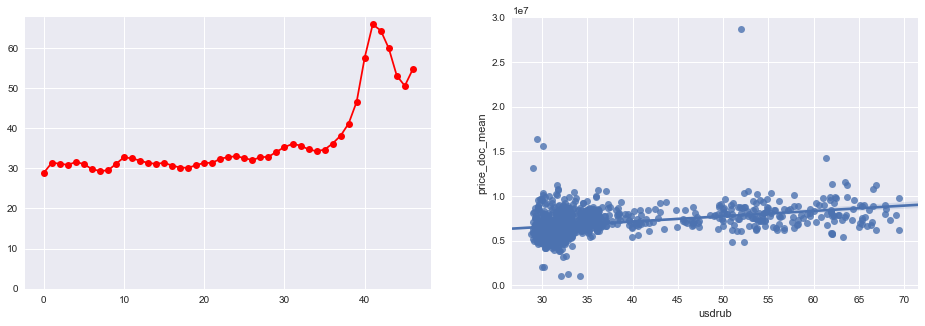

In [106]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize=[16,5])
ax[0].plot(df_year_month['usdrub'], marker='o', color='r')
ax[0].set_ylim(0)
sns.regplot(df_day['usdrub'], df_day['price_doc_mean'], ax=ax[1])

### CPI

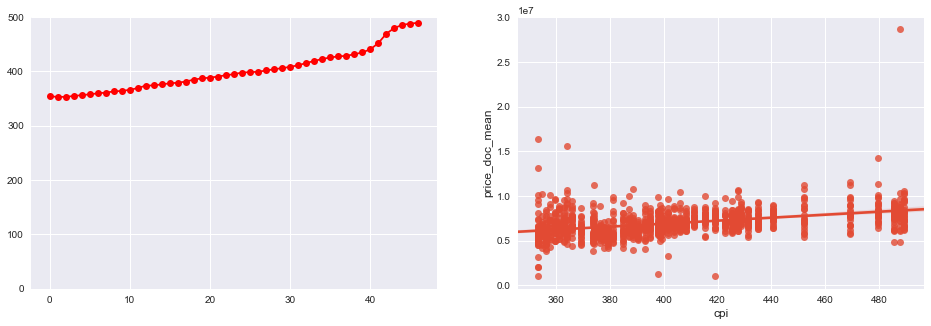

In [10]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize=[16,5])
ax[0].plot(df_year_month['cpi'], marker='o', color='r')
ax[0].set_ylim(0,500)
sns.regplot(df_day['cpi'], df_day['price_doc_mean'], ax=ax[1])

### Salary

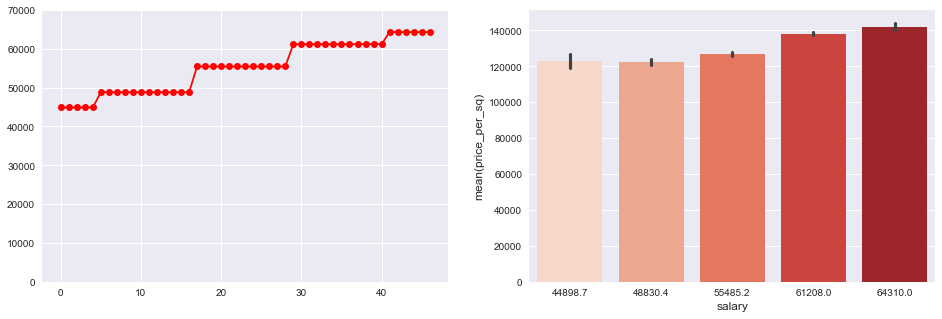

In [15]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize=[16,5])
ax[0].plot(df_year_month['salary'], marker='o', color='r')
ax[0].set_ylim(0,70000)
sns.barplot(train['salary'], train['price_per_sq'], palette='Reds')

### Housing Fund

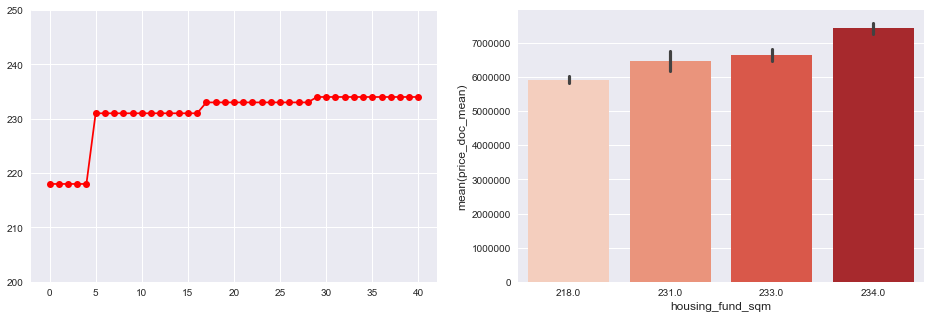

In [36]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize=[16,5])
ax[0].plot(df_year_month[df_year_month['housing_fund_sqm']>0]['housing_fund_sqm'], marker='o', color='r')
ax[0].set_ylim(200,250)
sns.barplot(df_year_month[df_year_month['housing_fund_sqm']>0]['housing_fund_sqm'], 
            df_year_month[df_year_month['housing_fund_sqm']>0]['price_doc_mean'], palette='Reds', ax=ax[1])

## Correlations

The figure below shows the correlations between these parameters using color coding. We can find groups of features most correlated with each other, for example, we see that the transportation features are highly correlated to each other, or also we can see this propety for economical features.

In the second figure, the correlation between average per squared price and other parameters is shown. We can find most correlated features, positive or negative relation, to the sale prices. For instance, age of the house, state, region and transportation facilities have an impact on prices. However, floor of the house and nearing to the church have almost no effect.

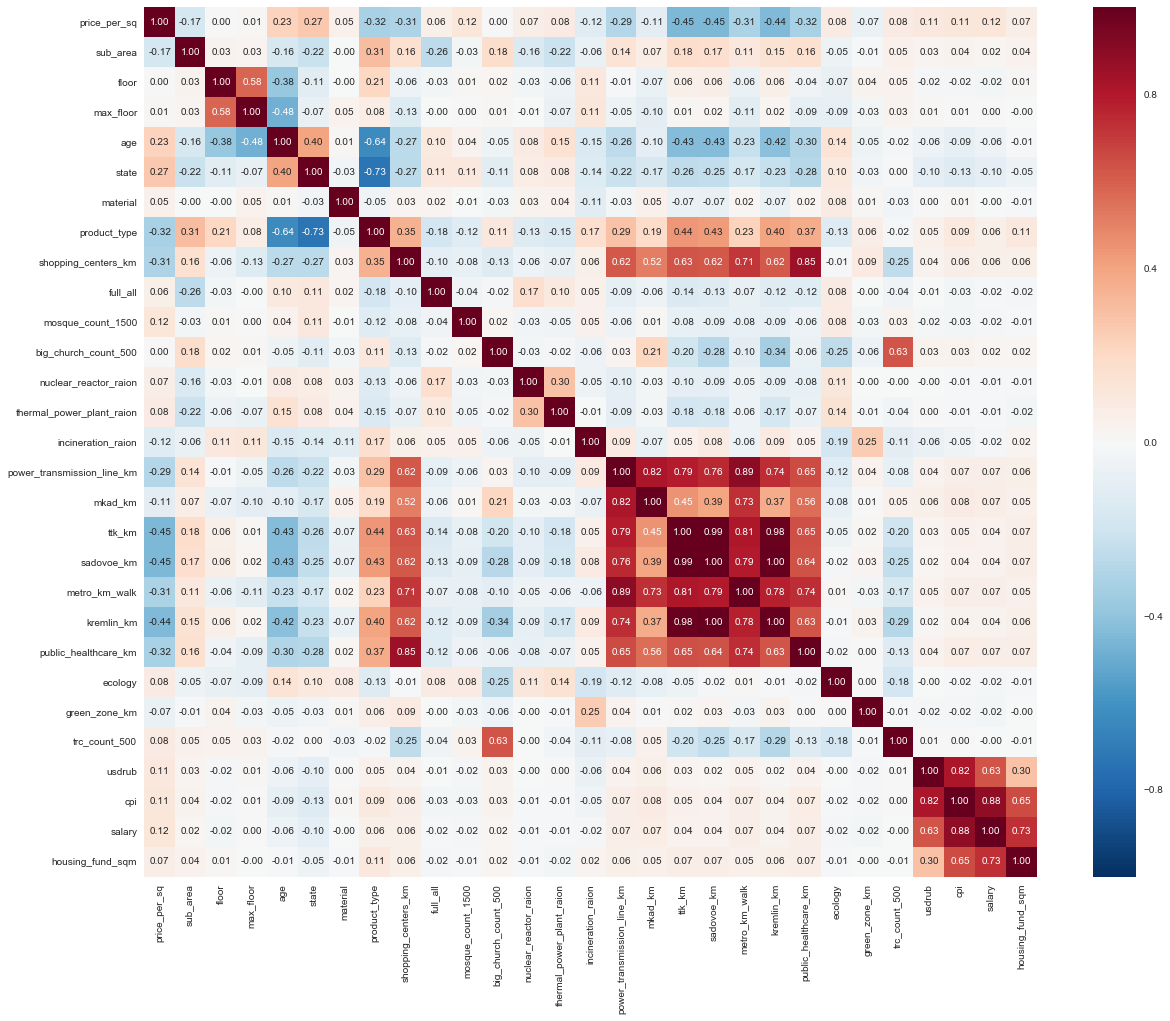

In [38]:
corr_cols = ['price_per_sq', 'sub_area', 'floor', 'max_floor', 'age', 'state', 'material', 'product_type',
             'shopping_centers_km', 'full_all', 'mosque_count_1500', 'big_church_count_500', 'nuclear_reactor_raion',
             'thermal_power_plant_raion', 'incineration_raion', 'power_transmission_line_km', 'mkad_km', 'ttk_km',
             'sadovoe_km', 'metro_km_walk', 'kremlin_km', 'public_healthcare_km', 'ecology', 'green_zone_km',
             'trc_count_500', 'usdrub', 'cpi', 'salary', 'housing_fund_sqm']
df = train[corr_cols]
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))

#fig, ax = plt.subplots(figsize=[20,16])
corrs = df[corr_cols].corr()
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=[20,16])
sns.heatmap(corrs, annot=True, fmt=".2f")

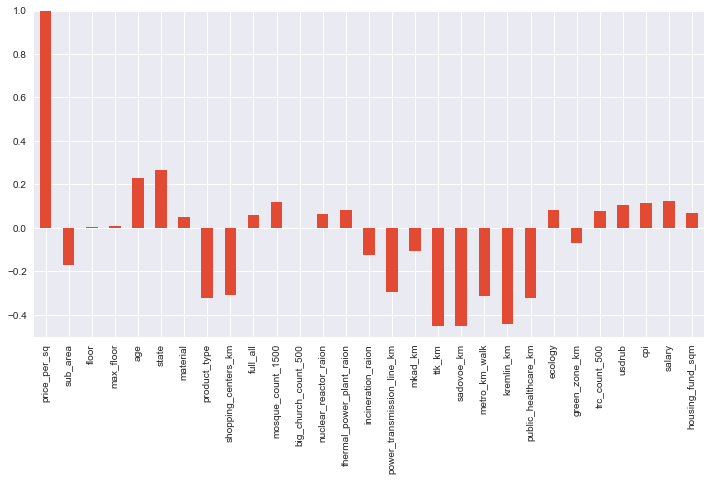

In [39]:
corrs = df[corr_cols].corr()

fig, ax = plt.subplots(figsize=[12,6])
corrs.price_per_sq.plot.bar()
_ = ax.set_ylim(-0.5,1)

## Important Features

There is a vey useful method implemented in algorithms, is feature_importance. It shows the most important features in data based their positive effect on some internal scores such as Gini Index measured during the Learning process. Here I used the Extreme Gradient boosting model (xgboost), and the 50 most important features are shown in the figure below with respect to their scores.

Here, we can see that, total and life area of a house, floor, state and age are the most important fetures. This is not an absolute measurement, as the colinearity between different parameters especially in high dimensional space, might be concluded to some weird results. As an instance we can see the Kindergartten distance as a very important feature.

<function matplotlib.pyplot.show>

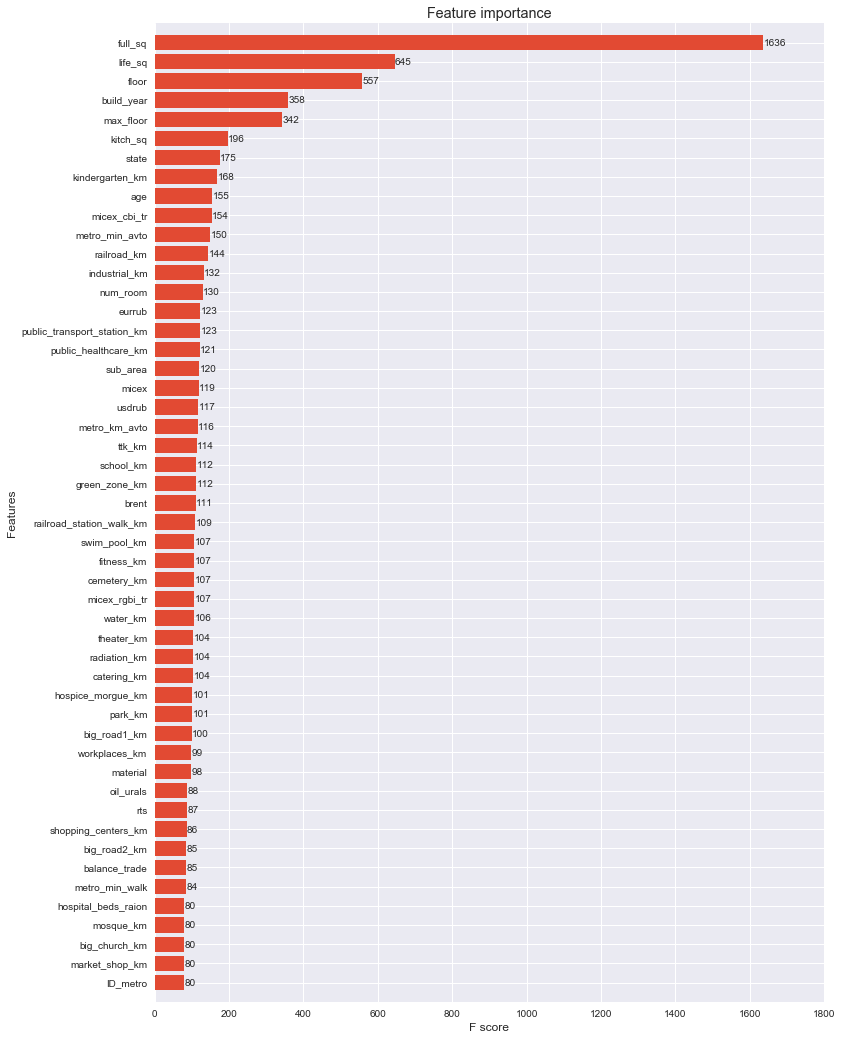

In [59]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

X_train = train.drop(['timestamp', 'id', 'price_doc', 'price_per_sq', 'price_per_sq_sub_area'], axis=1)
y_train = train['price_doc']
cols = X_train.columns
for c in X_train.columns:
    if X_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[c].values)) 
        X_train[c] = lbl.transform(list(X_train[c].values))
        
dtrain = xgb.DMatrix(X_train, y_train)

model = xgb.train(dict(xgb_params,silent=0),dtrain,num_boost_round=100)

fig,ax=plt.subplots(figsize = (12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show

## Machine Learning

The House price prediction is a regression problem, that could be seen from 2 different points of view, Interpolation and Forecasting. Naturally in real application the main goal is Forecasting the sale prices for cases in future, not cases in before. However, I evaluated both Regression and Forecasting power of algorithoms. 

For both of tests, the procedure is generaly the same with some minore differences. The first step is preprocessing data that consists of data wrangling. feature engineering and label encoding for all algorithms. The second step is splitting data into train and test set. The train set is used to learning and validation of the model and the test set is used to evaluating the model on a fresh data. For Interpolation problem I simply split the whole data randomly, using the `train_test_split`. 30% of the data is dedicated to test set and the remaining as training. However, the Forecasting problem is different. The oldest data must be used as training and the newest one as the test set. Therefore, the data related to the year of 2015 are assigned as test set and the remaining one are held as the training.

In next step, a naive imputation s applied on both training and test dataset. However this step is ignored for xgboost algorithm which handle the missing values by itself. Finally I applied five different regression models for both cases, Interpolation and Forecasting. The Algorithms utilized in this project are, Linear Regression, Decision Tree, Random Forest, Gradient Boosting and Extreme Gradient Boosting.

All models are evaluated with five different criterias. The most usaual score utilized for Regression models is $R^2$ that is a statistical measure of how close the data are to the fitted regression line. Mean Squared Error is another common way to measure the Regression power. In most relevant challenges in Kaggle, another measure, Root Mean Squared of Log Error (RMSLE) is used. I used also Mean Absolute Error (MAE) and the ratio of MAE and average sales prices, that give a practical sense about the error rate of the Regression model.

In [1]:
import pandas as pd
import numpy as np
import scipy as scp
from scipy import stats
import sklearn 
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

## Data preperation

In [25]:
train = pd.read_csv('./data/Sber Bank/train.csv')
train_cols = train.drop(['id', 'price_doc'], axis=1).columns
macro = pd.read_csv('./data/Sber Bank/macro.csv')
macro_cols = macro.columns
train = pd.merge(train, macro, on='timestamp')

### Data Wrnagling

In [26]:
train['timestamp'] = pd.to_datetime(train['timestamp'])

train.ix[train.full_sq <= 6, 'full_sq'] = np.nan
train.ix[train.life_sq <= 6, 'life_sq'] = np.nan

train.ix[train.full_sq > 2000, 'full_sq'] = np.nan
train.ix[train.life_sq > 2000, 'life_sq'] = np.nan

bad_index = [13117]
train.ix[bad_index, 'build_year'] = train.ix[bad_index, 'kitch_sq']
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = [10368, 11520, 13117, 21415, 28734]
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = train.ix[(train.num_room>=6) & (train.full_sq<100)].index
train.ix[bad_index, 'num_room'] = np.nan

bad_index = train.kitch_sq > train.life_sq
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = train.kitch_sq > train.full_sq
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = train.life_sq > train.full_sq
train.ix[bad_index, 'life_sq'] = np.nan

bad_index = train.floor > train.max_floor
train.ix[bad_index, 'floor'] = np.nan

train.ix[train.state > 30, 'state'] = np.nan

train.ix[train.ecology=='no data', 'ecology'] = np.nan

train.timestamp = pd.to_datetime(train.timestamp)
bad_index = (train.build_year == 0)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year
bad_index = (train.build_year == 1)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year-1
bad_index = (train.build_year == 3)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year-3
train.ix[train.build_year < 1600, 'build_year'] = np.nan
train.ix[train.build_year > 2018, 'build_year'] = np.nan

### Feature Engineering

In [27]:
train['age'] = train['timestamp'].dt.year - train['build_year']

train['year'] = train['timestamp'].dt.year
train['month'] = train['timestamp'].dt.month
train['quarter'] = train['timestamp'].dt.quarter
train = train.drop(['timestamp'], axis=1)

### Label Encoding

In [28]:
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[c].values)) 
        train[c] = lbl.transform(list(train[c].values))

### Split data to test and train

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(['id', 'price_doc'], axis=1), 
                                                    train['price_doc'], 
                                                    test_size=0.3, 
                                                    random_state=42)

print 'Length of X_train data: {}'.format(X_train.shape) 
print 'Length of y_train data: {}'.format(y_train.shape) 
print 'Length of X_test data:  {}'.format(X_test.shape)
print 'Length of y_test data:  {}'.format(y_test.shape) 

Length of X_train data: (21329, 392)
Length of y_train data: (21329L,)
Length of X_test data:  (9142, 392)
Length of y_test data:  (9142L,)


### Imputation

In [30]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
train_cols = X_train.columns
X_train_imp = pd.DataFrame(imp.fit_transform(X_train))
X_train_imp.columns = train_cols

#imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
test_cols = X_test.columns
X_test_imp = pd.DataFrame(imp.transform(X_test# Root Mean Squared Log error
X_test_imp.columns = test_cols

## Useful Functions

In [6]:
# Root Mean Squared Log error
def RMSLE(y, y_):
    return np.sqrt(np.mean(np.log((y+1)/(y_+1))**2))

def model_eval(estimator, X_train, y_train, X_test, y_test):
    y_train_pred = cross_val_predict(estimator, X_train, y_train, cv=5)
    train_r2_score = r2_score(y_train, y_train_pred)
    train_mse = np.sqrt(np.mean((y_train-y_train_pred)**2))
    train_rmsle = RMSLE(y_train, y_train_pred)
    train_mae = np.mean(np.abs(y_train-y_train_pred))
    train_error_ratio = train_mae/np.mean(y_train)
    
    model = estimator.fit(X_train, y_train)
    y_test_pred = estimator.predict(X_test)
    test_r2_score = r2_score(y_test, y_test_pred)
    test_mse = np.sqrt(np.mean((y_test-y_test_pred)**2))
    test_rmsle = RMSLE(y_test, y_test_pred)
    test_mae = np.mean(np.abs(y_test-y_test_pred))
    test_error_ratio = test_mae/np.mean(y_test)
    
    print 'train RMSLE:            {}'.format(train_rmsle)
    print 'train CV R2_Score:      {}'.format(train_r2_score)
    print 'train mse:              {}'.format(train_mse)
    print 'train mae:              {}'.format(train_mae)
    print 'train error ratio:      {}'.format(train_error_ratio)
    
    print 'test rmsle:             {}'.format(test_rmsle)
    print 'test R2_Score:          {}'.format(test_r2_score)
    print 'test mse:               {}'.format(test_mse)
    print 'test mae:               {}'.format(test_mae)
    print 'test error ratio:       {}'.format(test_error_ratio)
    
    return y_train_pred, y_test_pred, model

## Regression Power

### Linear Model

The simplest choice for a Regression model is Linear Regression. It's very fast and dosen't need parameter tuning. On the other hand, it works blindly and is not an accurate model especially in the case of Forecasting. As could be seen the model is not overfitted and scores of Validation and test set are very close. Ther Error ratio of the test set is more than 24%.

In [39]:
lin = LinearRegression()
y_train_lin, y_test_lin, model_lin = model_eval(lin, X_train_imp, y_train, X_test_imp, y_test)

train RMSLE:         0.521117767634
train R2_Score:      0.5194533265
train MSE:           3355619.04979
train MAE:           1799415.70477
train ERR_Ratio:     0.251872141465
test  RMSLE:         0.514336603178
test  R2_Score:      0.554708765911
test  MSE:           3093022.94726
test  MAE:           1750240.07953
test ERR_Ratio:      0.247427751959


### Decision Tree

Decision Tree is a non-parametric supervised learning method used for classification and regression. It's very fast and simpy understandable. It can handle categorical data and doesn't need data scaling which is required in some algorithms such as SVM. However, it's not powerful in exteracting linear cmbinations of features.

It has different hyperparameters that must be tuned using a grid search and cross validation. The most important parameters are, The maximum depth of the tree (**max_depth**), The minimum number of samples required to split an internal node (**min_samples_split**), The minimum number of samples required to be at a leaf node (**min_samples_leaf**), Threshold for early stopping in tree growth (**min_impurity_split**). All of these parameters must be well tuned to prevetn both underfitting and overfitting.

With inspiration from ... I utilized a stage-wise tuning to optimize the hyperparameters. The full procedure could be seen in ... .

With the selection of the best parameters, I got 23.2% error ration, 1.5% better than the Linear Regression.

In [45]:
dtr = DecisionTreeRegressor(max_depth=8, 
                            min_samples_split=42,
                            min_samples_leaf=30,
                            min_impurity_split=1e-05)
y_train_dtr, y_test_dtr, model_dtr = model_eval(dtr, X_train_imp, y_train, X_test_imp, y_test)

train RMSLE:         0.492966338727
train R2_Score:      0.571893492748
train MSE:           3167238.57472
train MAE:           1678079.29543
train ERR_Ratio:     0.234888149841
test  RMSLE:         0.491143564065
test  R2_Score:      0.583444701558
test  MSE:           2991557.8162
test  MAE:           1645508.96042
test ERR_Ratio:      0.232622134338


### Random Forest

As mentioned Decision Tree has various advantages, unless it's not a powerful and accurate model. However, with the use of Ensemble methods we can cover that and boosting its accuracy. Random Forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. 

In addition to the parameters mentioned for Decision Trees, Random Forest has two important features as well. The first one is the number of trees in the forest (**n_estimator**), and the other one is the number of features to consider when looking for the best split (**max_features**). In most cases the best value for **max_features** are the squared number of features. However, the best value for **n_estimator** must be tuned. The higher the **n_estimator** is selected, the better accuracy is gotten, with the penalty of slower training.

Again I used and stage-wise parameter tuning, that could be followed ..., and the best parameters concluded to 19.5% error ratio, 3.7% better than Decision Tree, and 5.2% better than Linear Regression.

In [47]:
rfr = RandomForestRegressor(max_depth=17, 
                            min_samples_split=2,
                            min_samples_leaf=1,
                            min_impurity_split=1e-05,
                            n_estimators=250)
y_train_rfr, y_test_rfr, model_rfr = model_eval(rfr, X_train_imp, y_train, X_test_imp, y_test)

train RMSLE:         0.471913960878
train R2_Score:      0.667334666772
train MSE:           2791956.4291
train MAE:           1420968.80497
train ERR_Ratio:     0.198899262085
test  RMSLE:         0.468544397924
test  R2_Score:      0.684452331387
test  MSE:           2603715.67148
test  MAE:           1378905.76144
test ERR_Ratio:      0.19493300188


### Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

The most important parameters in Gradient Boosting, are **max_depth**, **min_samples_split**, **min_samples_leaf**, **min_impurity_split**, **n_estimators**, The fraction of observations to be selected for each tree (**subsample**) and the **learning_rate** that determines the impact of each tree on the final outcome. 

Again I used a stage-wise hyperparameter tuning in which the complete procedure could be seen ... . Using the best selection of parameters, concluded 19.5% error ratio the same as the Random Forest.                                

In [50]:
gbr = GradientBoostingRegressor(max_depth=6, 
                                min_samples_split=50,
                                min_samples_leaf=17,
                                subsample=0.8,
                                min_impurity_split=1e-07,
                                learning_rate=0.1,
                                n_estimators=250,
                                random_state=51)
y_train_gbr, y_test_gbr, model_gbr = model_eval(gbr, X_train_imp, y_train, X_test_imp, y_test)

train RMSLE:         0.471607970965
train R2_Score:      0.68654159834
train MSE:           2710159.31259
train MAE:           1424985.79277
train ERR_Ratio:     0.19946153756
test  RMSLE:         0.469836945602
test  R2_Score:      0.700785616092
test  MSE:           2535433.95845
test  MAE:           1379365.4545
test ERR_Ratio:      0.19499798772


### Extreme Gradient Boosting

Extreme Gradient Boosting is an efficient and scalable implementation of Gradient Boosting framework by Friedman, with several benefits. It's fast as it can automatically do parallel computation, it's optimized for sparse input, and also it can handle missing values in the input data.

The most important parameters are **max_depth**, **learning_rate**, **subsample**, **n_estimators**, **early_stopping_rounds**, the fraction of columns to be randomly samples for each tree (**colsample_bytree**).

The error ratio acquired from this algorithm. using the tuned parameters, is 19% that means 0.5% better than Gradient boosting.

In [51]:
xgr = XGBRegressor(max_depth=6, 
                   learning_rate=0.1, 
                   subsample=0.8, 
                   colsample_bytree=0.8, 
                   n_estimators=250, 
                   early_stopping_rounds=50)

y_train_xgr, y_test_xgr, model_xgr = model_eval(xgr, X_train, y_train, X_test, y_test)

train RMSLE:         0.469532853313
train R2_Score:      0.686632182376
train MSE:           2709760.18139
train MAE:           1405731.125
train ERR_Ratio:     0.196766376908
test  RMSLE:         0.467161676125
test  R2_Score:      0.710471970941
test  MSE:           2494057.00785
test  MAE:           1347948.23731
test ERR_Ratio:      0.190556601928


## Summary on Regression Power

The best perforemance is acquired from xgboost with 19% error ratio and the worst one is measured for Linear Regression model with 24.7% error ratio. The table below shows the scores of different models in Regression problem:

| Regression Model  | $R^2$         | RMSLE     | Error Ratio |
| ----------------- |:-------------:|:---------:|:-----------:|
| Linear Regression |    0.5547     |   0.5143  |  0.2474     |
| Decision Tree     |    0.5834     |   0.4911  |  0.2326     |
| Random Forest     |    0.6844     |   0.4685  |  0.1949     |
| Gradient Boosting |    0.7007     |   0.4698  |  0.1949     |
| Xgboost           |    0.7104     |   0.4671  |  0.1905     |

## Forecasting Power

As mentioned before, the most important problem in price prediction is the Forecasting power of the model. Here again I prepared data, and splitter the newest data as the test set and the remaining as the train data. The algorithms used in the Regression section, utilized in Forecasting power. The optimum parameters for each model are selected as before.

The best perforemance has been measured for Gradient boosting with 17.9% error ratio and the worst one is for Linear Regression with 45% error ratio. As expected, the Linear Regression had weaker perforemance in Forecasting problem comparison to Regression problem. The table below shows the scores of different models:

| Regression Model  | $R^2$         | RMSLE     | Error Ratio |
| ----------------- |:-------------:|:---------:|:-----------:|
| Linear Regression |    0.1993     |   0.6226  |  0.4516     |
| Decision Tree     |    0.6247     |   0.4217  |  0.2346     |
| Random Forest     |    0.6247     |   0.4217  |  0.2346     |
| Gradient Boosting |    0.7505     |   0.3966  |  0.1798     |
| Xgboost           |    0.7424     |   0.3991  |  0.1881     |

## Data Preperation

In [69]:
train = pd.read_csv('./data/Sber Bank/train.csv')
train_cols = train.drop(['id', 'price_doc'], axis=1).columns
macro = pd.read_csv('./data/Sber Bank/macro.csv')
macro_cols = macro.columns
train = pd.merge(train, macro, on='timestamp')

### Data Wrnagling

In [70]:
train['timestamp'] = pd.to_datetime(train['timestamp'])

train.ix[train.full_sq <= 6, 'full_sq'] = np.nan
train.ix[train.life_sq <= 6, 'life_sq'] = np.nan

train.ix[train.full_sq > 2000, 'full_sq'] = np.nan
train.ix[train.life_sq > 2000, 'life_sq'] = np.nan

bad_index = [13117]
train.ix[bad_index, 'build_year'] = train.ix[bad_index, 'kitch_sq']
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = [10368, 11520, 13117, 21415, 28734]
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = train.ix[(train.num_room>=6) & (train.full_sq<100)].index
train.ix[bad_index, 'num_room'] = np.nan

bad_index = train.kitch_sq > train.life_sq
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = train.kitch_sq > train.full_sq
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = train.life_sq > train.full_sq
train.ix[bad_index, 'life_sq'] = np.nan

bad_index = train.floor > train.max_floor
train.ix[bad_index, 'floor'] = np.nan

train.ix[train.state > 30, 'state'] = np.nan

train.ix[train.ecology=='no data', 'ecology'] = np.nan

train.timestamp = pd.to_datetime(train.timestamp)
bad_index = (train.build_year == 0)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year
bad_index = (train.build_year == 1)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year-1
bad_index = (train.build_year == 3)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year-3
train.ix[train.build_year < 1600, 'build_year'] = np.nan
train.ix[train.build_year > 2018, 'build_year'] = np.nan

### Feature Engineering

In [71]:
train['age'] = train['timestamp'].dt.year - train['build_year']

train['year'] = train['timestamp'].dt.year
train['month'] = train['timestamp'].dt.month
train['quarter'] = train['timestamp'].dt.quarter
train = train.drop(['timestamp'], axis=1)

### Label Encoing the Categorical features

In [72]:
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[c].values)) 
        train[c] = lbl.transform(list(train[c].values))

### Splitting data

In [74]:
X_train_forecast = train[train.year < 2015].drop(['id', 'price_doc'], axis=1)
y_train_forecast = train[train.year < 2015]['price_doc']
X_test_forecast = train[train.year == 2015].drop(['id', 'price_doc'], axis=1)
y_test_forecast = train[train.year == 2015]['price_doc']

print 'Length of X_train data: {}'.format(X_train_forecast.shape) 
print 'Length of y_train data: {}'.format(y_train_forecast.shape) 
print 'Length of X_test data:  {}'.format(X_test_forecast.shape)
print 'Length of y_test data:  {}'.format(y_test_forecast.shape) 

Length of X_train data: (27232, 392)
Length of y_train data: (27232L,)
Length of X_test data:  (3239, 392)
Length of y_test data:  (3239L,)


### Imputation

In [76]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
train_cols = X_train_forecast.columns
X_train_forecast_imp = pd.DataFrame(imp.fit_transform(X_train_forecast))
X_train_forecast_imp.columns = train_cols

#imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
test_cols = X_test_forecast.columns
X_test_forecast_imp = pd.DataFrame(imp.transform(X_test_forecast))
X_test_forecast_imp.columns = test_cols

### Linear Model 

In [79]:
lin = LinearRegression()

model_lin = lin.fit(X_train_forecast_imp, y_train_forecast)
y_test_forecast_lin = lin.predict(X_test_forecast_imp)

test_r2_score = r2_score(y_test_forecast, y_test_forecast_lin)
test_mse = np.sqrt(np.mean((y_test_forecast-y_test_forecast_lin)**2))
test_rmsle = RMSLE(y_test_forecast, y_test_forecast_lin)
test_mae = np.mean(np.abs(y_test_forecast-y_test_forecast_lin))
test_error_ratio = test_mae/np.mean(y_test_forecast)
    
print 'test RMSLE:            {}'.format(test_rmsle)
print 'test CV R2_Score:      {}'.format(test_r2_score)
print 'test mse:              {}'.format(test_mse)
print 'test mae:              {}'.format(test_mae)
print 'test error ratio:      {}'.format(test_error_ratio)

train RMSLE:            0.622645169568
train CV R2_Score:      0.199307429316
train mse:              5019964.89844
train mae:              3696111.54692
train error ratio:      0.451631304218


### Decision Tree

In [81]:
dtr = DecisionTreeRegressor(max_depth=8, 
                            min_samples_split=42,
                            min_samples_leaf=30,
                            min_impurity_split=1e-05)

model_dtr = dtr.fit(X_train_forecast_imp, y_train_forecast)
y_test_forecast_dtr = dtr.predict(X_test_forecast_imp)

test_r2_score = r2_score(y_test_forecast, y_test_forecast_dtr)
test_mse = np.sqrt(np.mean((y_test_forecast-y_test_forecast_dtr)**2))
test_rmsle = RMSLE(y_test_forecast, y_test_forecast_dtr)
test_mae = np.mean(np.abs(y_test_forecast-y_test_forecast_dtr))
test_error_ratio = test_mae/np.mean(y_test_forecast)
    
print 'test RMSLE:            {}'.format(test_rmsle)
print 'test CV R2_Score:      {}'.format(test_r2_score)
print 'test mse:              {}'.format(test_mse)
print 'test mae:              {}'.format(test_mae)
print 'test error ratio:      {}'.format(test_error_ratio)

train RMSLE:            0.421749574007
train CV R2_Score:      0.624764916634
train mse:              3436524.93454
train mae:              1920491.23515
train error ratio:      0.234666608477


### Random Forest

In [82]:
rfr = RandomForestRegressor(max_depth=17, 
                            min_samples_split=2,
                            min_samples_leaf=1,
                            min_impurity_split=1e-05,
                            n_estimators=250)

model_rfr = rfr.fit(X_train_forecast_imp, y_train_forecast)
y_test_forecast_rfr = rfr.predict(X_test_forecast_imp)

test_r2_score = r2_score(y_test_forecast, y_test_forecast_rfr)
test_mse = np.sqrt(np.mean((y_test_forecast-y_test_forecast_rfr)**2))
test_rmsle = RMSLE(y_test_forecast, y_test_forecast_rfr)
test_mae = np.mean(np.abs(y_test_forecast-y_test_forecast_rfr))
test_error_ratio = test_mae/np.mean(y_test_forecast)
    
print 'test RMSLE:            {}'.format(test_rmsle)
print 'test CV R2_Score:      {}'.format(test_r2_score)
print 'test mse:              {}'.format(test_mse)
print 'test mae:              {}'.format(test_mae)
print 'test error ratio:      {}'.format(test_error_ratio)

train RMSLE:            0.402837027773
train CV R2_Score:      0.706719994623
train mse:              3038148.57739
train mae:              1729151.6599
train error ratio:      0.211286647991


### Gradient Boosting

In [83]:
gbr = GradientBoostingRegressor(max_depth=6, 
                                min_samples_split=50,
                                min_samples_leaf=17,
                                subsample=0.8,
                                min_impurity_split=1e-07,
                                learning_rate=0.01,
                                n_estimators=2500,
                                random_state=51)

model_gbr = gbr.fit(X_train_forecast_imp, y_train_forecast)
y_test_forecast_gbr = gbr.predict(X_test_forecast_imp)

test_r2_score = r2_score(y_test_forecast, y_test_forecast_gbr)
test_mse = np.sqrt(np.mean((y_test_forecast-y_test_forecast_gbr)**2))
test_rmsle = RMSLE(y_test_forecast, y_test_forecast_gbr)
test_mae = np.mean(np.abs(y_test_forecast-y_test_forecast_gbr))
test_error_ratio = test_mae/np.mean(y_test_forecast)
    
print 'test RMSLE:            {}'.format(test_rmsle)
print 'test CV R2_Score:      {}'.format(test_r2_score)
print 'test mse:              {}'.format(test_mse)
print 'test mae:              {}'.format(test_mae)
print 'test error ratio:      {}'.format(test_error_ratio)

train RMSLE:            0.396630267865
train CV R2_Score:      0.750583176894
train mse:              2801758.20571
train mae:              1471802.98113
train error ratio:      0.179840973813


### Extreme Gradient Boosting

In [84]:
xgr = XGBRegressor(max_depth=6, 
                   learning_rate=0.1, 
                   subsample=0.8, 
                   colsample_bytree=0.8, 
                   n_estimators=250, 
                   early_stopping_rounds=50)

model_xgr = xgr.fit(X_train_forecast_imp, y_train_forecast)
y_test_forecast_xgr = xgr.predict(X_test_forecast_imp)

test_r2_score = r2_score(y_test_forecast, y_test_forecast_xgr)
test_mse = np.sqrt(np.mean((y_test_forecast-y_test_forecast_xgr)**2))
test_rmsle = RMSLE(y_test_forecast, y_test_forecast_xgr)
test_mae = np.mean(np.abs(y_test_forecast-y_test_forecast_xgr))
test_error_ratio = test_mae/np.mean(y_test_forecast)
    
print 'test RMSLE:            {}'.format(test_rmsle)
print 'test CV R2_Score:      {}'.format(test_r2_score)
print 'test mse:              {}'.format(test_mse)
print 'test mae:              {}'.format(test_mae)
print 'test error ratio:      {}'.format(test_error_ratio)

train RMSLE:            0.399145058004
train CV R2_Score:      0.742438066281
train mse:              2847138.66659
train mae:              1540023.24417
train error ratio:      0.188176871142


## Conclusion and Future Works

In this project, a real application in machine learning and data science investigated. We saw that in such a project, it's important to firstly exploring the dataset to find outliers and bad data in addition to missing values. The data wrangling is not only to handling the obviouse missing values but also the hidden ones.

Feature engineering is an Art in the data science. It's very important in both EDA and ML. For example, we saw that, despit some feature have a strong effect on House prices, however, they don't have a notable impact on per squared house prices.

Different machine learning algorithms evaluated in two different problems. The Regression and the Forecasting problems. We saw that most of the algorithms have a similiar perforemance in both cases. However, the Linear Regression had a weak perforemance on Regression problem and much weaker in Frecasting one. The best perforemance was computed for Gradient boosting and Xgboost, with around 19% error ratio, in both cases.

In contrary to our expectation, a Deep Learning model with 4 Fully connected layers, didn't have a satisfactory results. However it could be deeply studied in future.

By the way, there is some recommendations for future researches, that have been concluded within this project:

- As seen in Time series analysis, the House Market has a seasonality characteristcs. Therefore it's highly recommended to utilize the TSA for such these problems, especially in the case of forecasting the target in future.

- It might be also useful to learning models in clusters. So, we can firstly split data in some number of clusters, and then learning the regression model on each one. This could be effective because different clusters might have different characteristics.

- Another recommendation is the utilization of a combination of different models with different wrngling options and applying some weights proportion to their accuracies.